In [1]:
%load_ext autoreload
from ddls.plotting.plotting import plot_line, plot_bar, plot_hist

from collections import defaultdict
from sqlitedict import SqliteDict
import pprint
import glob
import time
import pandas as pd
import numpy as np
import scipy.stats as st

In [18]:
%autoreload

# load files
base_folder = '/scratch/datasets/ddls/sims/'
base_name = 'ramp_cluster'

ids = [26]



steps_logs_dict = defaultdict(lambda : defaultdict(list))
sim_logs_dict = defaultdict(lambda : defaultdict(list))
start_time = time.time()
for i in ids:
    agent = base_name + f'_{i}'
    paths = [reset_folder for reset_folder in glob.glob(base_folder + f'/{base_name}/{agent}/*/')]
    print(f'i: {i} | agent: {agent} | paths: {paths}')
    
    for path in paths:
        with SqliteDict(path + '/steps_log.sqlite') as log:
            for key, val in log.items():
                steps_logs_dict[agent][key].extend(val)
            log.close()

        with SqliteDict(path + '/sim_log.sqlite') as log:
            for key, val in log.items():
                sim_logs_dict[agent][key].extend(val)
            log.close()

i: 26 | agent: ramp_cluster_26 | paths: ['/scratch/datasets/ddls/sims//ramp_cluster/ramp_cluster_26/reset_1/']


In [19]:
# augment logs dict as desired

# def augment_steps_logs_dict(steps_logs_dict):
#     for agent in steps_logs_dict.keys():
        
# #         wallclock time
# #         steps_logs_dict[agent]['wallclock_time'] = [steps_logs_dict[agent]['step_end_time'][0]]
# #         for step_end_time in steps_logs_dict[agent]['step_end_time'][1:]:
# #             steps_logs_dict[agent]['wallclock_time'].append(steps_logs_dict[agent]['wallclock_time'][-1] + step_end_time)
#     steps_logs_dict = []
    
#     return steps_logs_dict
            
# steps_logs_dict = augment_steps_logs_dict(steps_logs_dict)
        
print(f'\nsteps_logs_dict: {steps_logs_dict}\n')
print(f'\nsim_logs_dict: {sim_logs_dict}\n')
print(f'\nAll data loaded in {time.time() - start_time:.3f} s.')


steps_logs_dict: defaultdict(<function <lambda> at 0x7f7e84b3e8b0>, {'ramp_cluster_26': defaultdict(<class 'list'>, {'step_counter': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], 'step_start_time': [0, 560, 1396, 1756, 2480, 3235, 3835, 4308, 4705, 5411, 5544, 5952, 5963, 6138, 6578, 6776, 6988, 7526, 7534, 7599, 8516, 8629, 9493, 10018, 10203, 10974, 11051, 11351, 11500, 12433, 14004, 14269, 15062, 15419, 19230], 'mean_num_active_workers': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'num_jobs_completed': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], 'num_jobs_running': [1, 2, 3, 4, 5, 6, 6, 6, 6, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 5, 4, 3, 2, 1], 'num_jobs_arrived': [1, 1, 1, 1, 1,

# Steps logs plots

Metrics to plot: ['job_queue_length', 'mean_num_active_workers', 'mean_worker_compute_utilisation', 'num_jobs_arrived', 'num_jobs_blocked', 'num_jobs_completed', 'num_jobs_running', 'step_end_time', 'step_start_time']
Metrics to skip: {'step_counter'}

Plotting metric job_queue_length


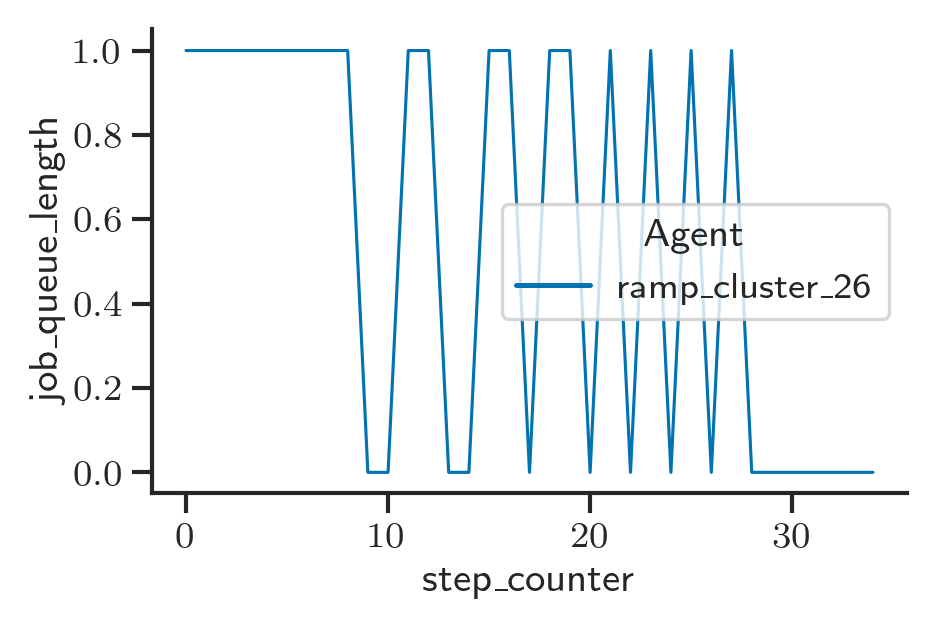

Plotting metric mean_num_active_workers


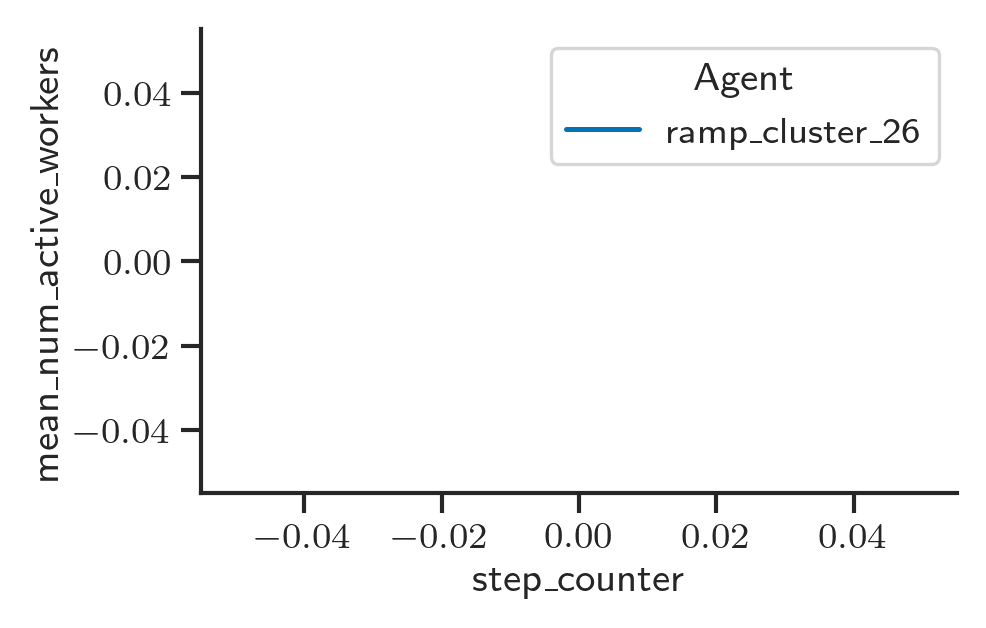

Plotting metric mean_worker_compute_utilisation


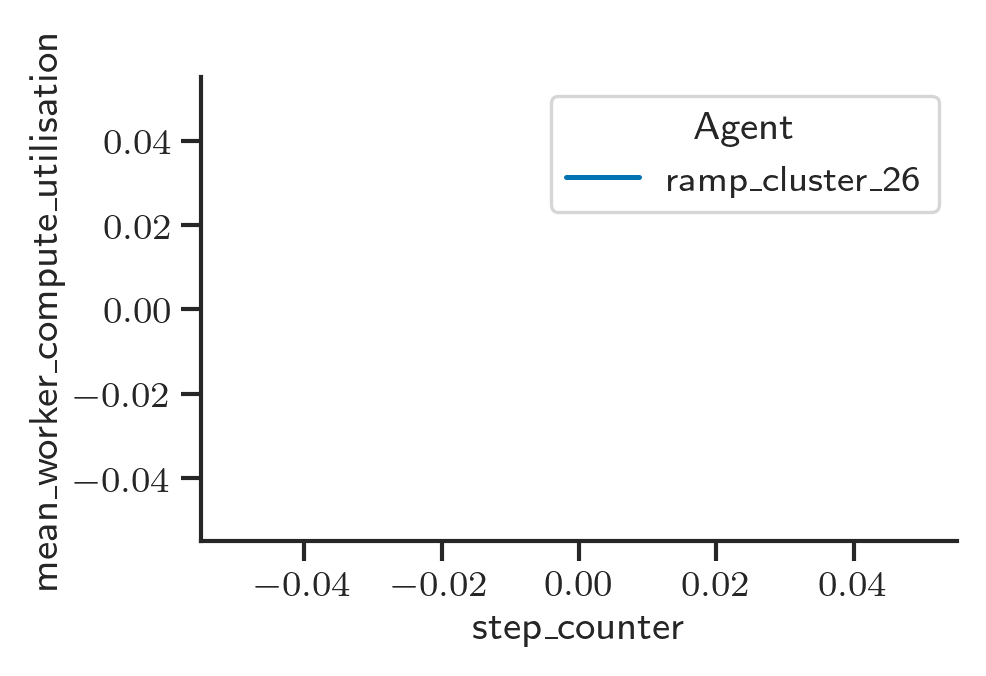

Plotting metric num_jobs_arrived


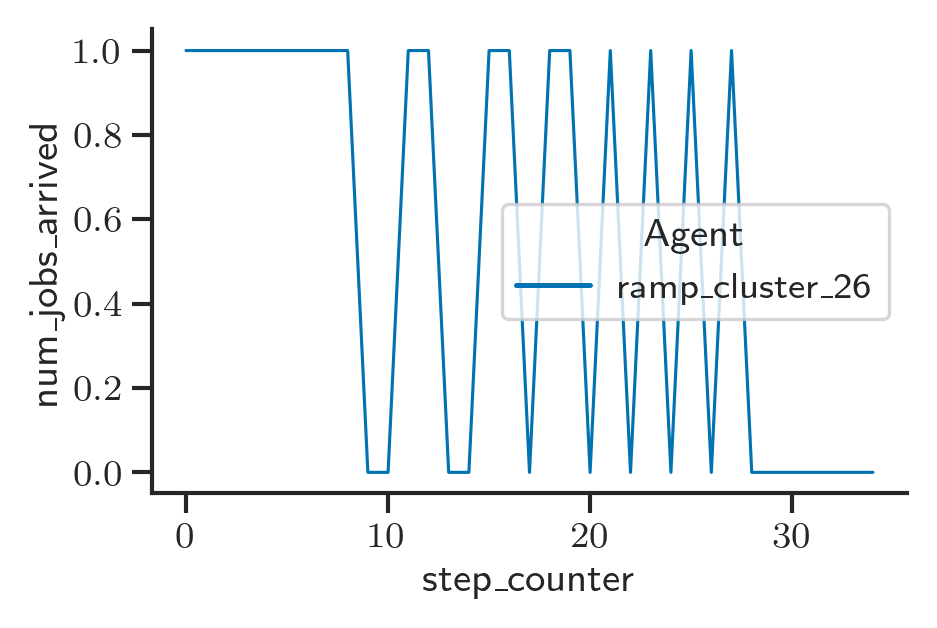

Plotting metric num_jobs_blocked


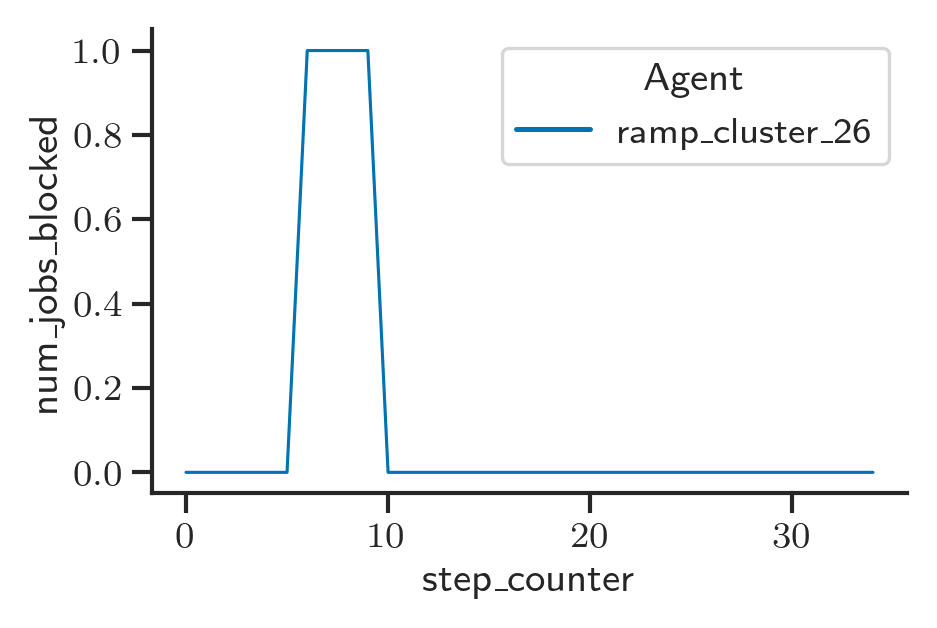

Plotting metric num_jobs_completed


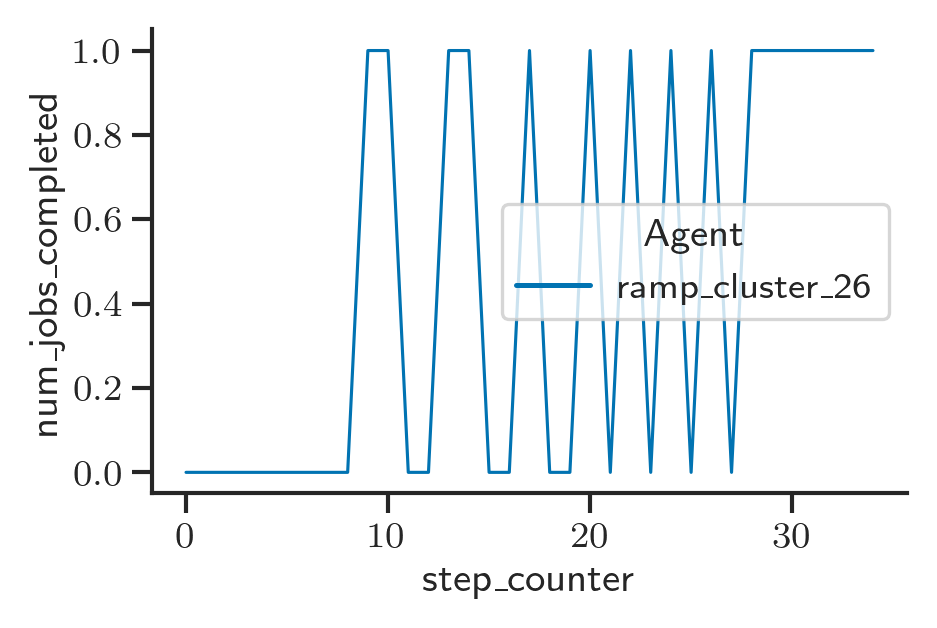

Plotting metric num_jobs_running


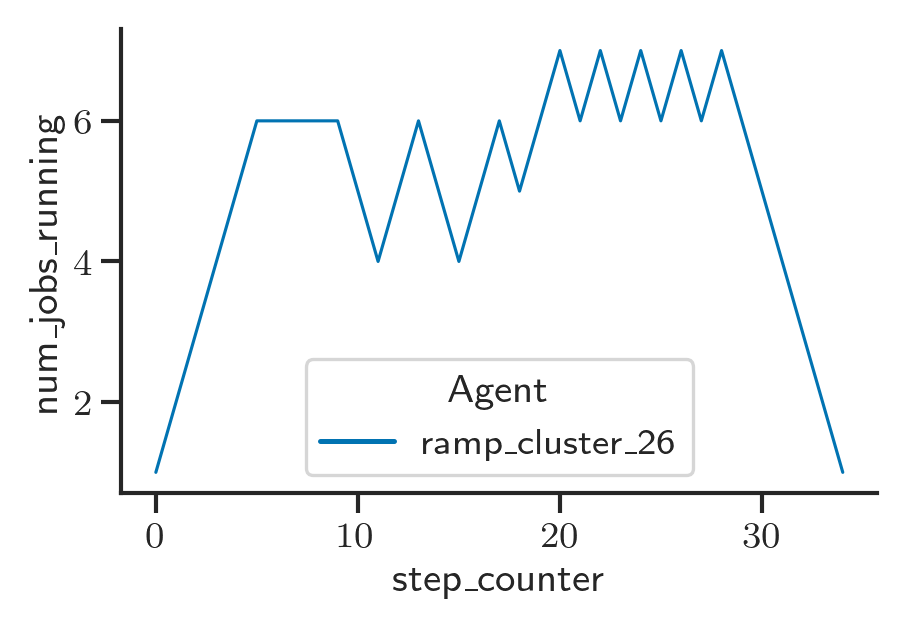

Plotting metric step_end_time


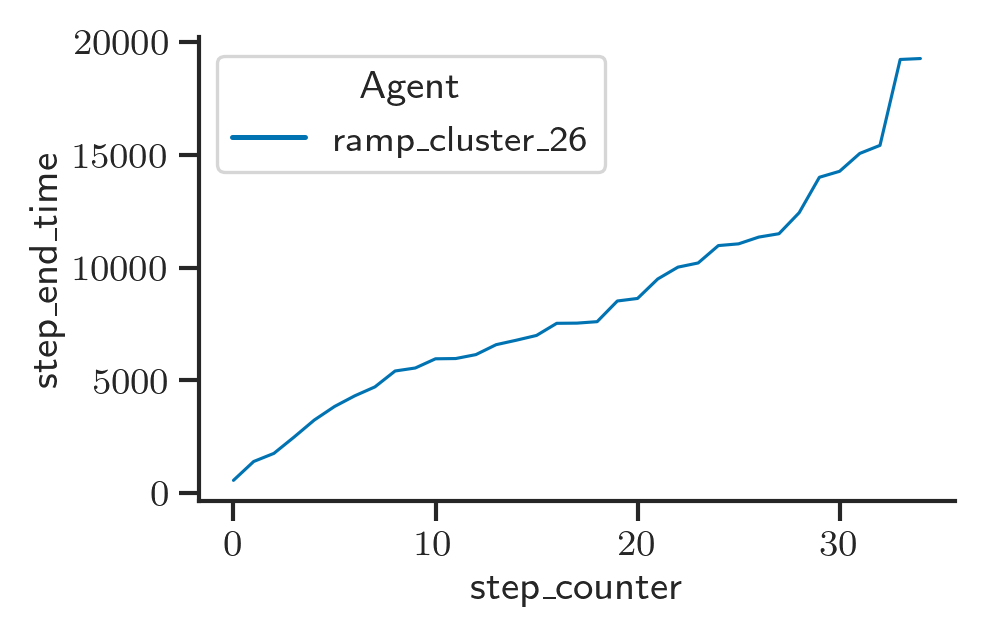

Plotting metric step_start_time


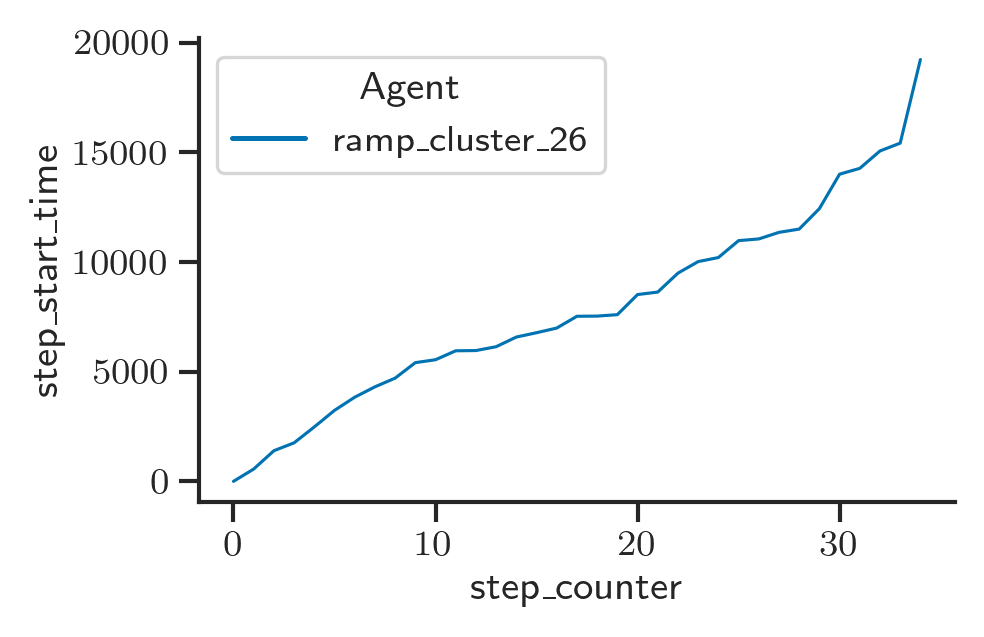

In [20]:
%autoreload

# plot config
x = 'step_counter'
# x = 'step_end_time'
scaling_factor = 1
metrics_to_skip = {x}

# print(len(steps_logs_dict[agent]['num_jobs_arrived']))
# print(len(steps_logs_dict[agent]['mean_num_active_workers']))
# print(len(steps_logs_dict[agent]['step_counter']))
# raise Exception()

# make plots
metrics = steps_logs_dict[agent].keys()
metrics_to_plot = sorted([metric for metric in metrics if metric not in metrics_to_skip])
print(f'Metrics to plot: {metrics_to_plot}\nMetrics to skip: {metrics_to_skip}\n')
for metric in metrics_to_plot:
    print(f'Plotting metric {metric}')
    plot_dict = defaultdict(list)
    for _agent in steps_logs_dict.keys():
        plot_dict['Agent'].extend([_agent for _ in range(len(steps_logs_dict[_agent][metric]))])
        plot_dict[x].extend(steps_logs_dict[_agent][x])
        plot_dict[metric].extend(steps_logs_dict[_agent][metric])
    fig = plot_line(pd.DataFrame(plot_dict), 
                    x=x, 
                    y=metric, 
                    hue='Agent', 
                    xlabel=x, 
                    ylabel=metric, 
                    err_style='band', # 'band' 'bars'
                    ci=68, # 95 68
                    scaling_factor=scaling_factor,
                    show_fig=True)

# Sim logs plots

Metrics to plot: ['job_completion_time', 'jobs_blocked_num_edges', 'jobs_blocked_num_nodes', 'jobs_blocked_total_dependency_size', 'jobs_blocked_total_operation_memory_cost', 'jobs_completed_num_edges', 'jobs_completed_num_nodes', 'jobs_completed_total_dependency_size', 'jobs_completed_total_operation_memory_cost']
Metrics to skip: {}

Plotting metric job_completion_time


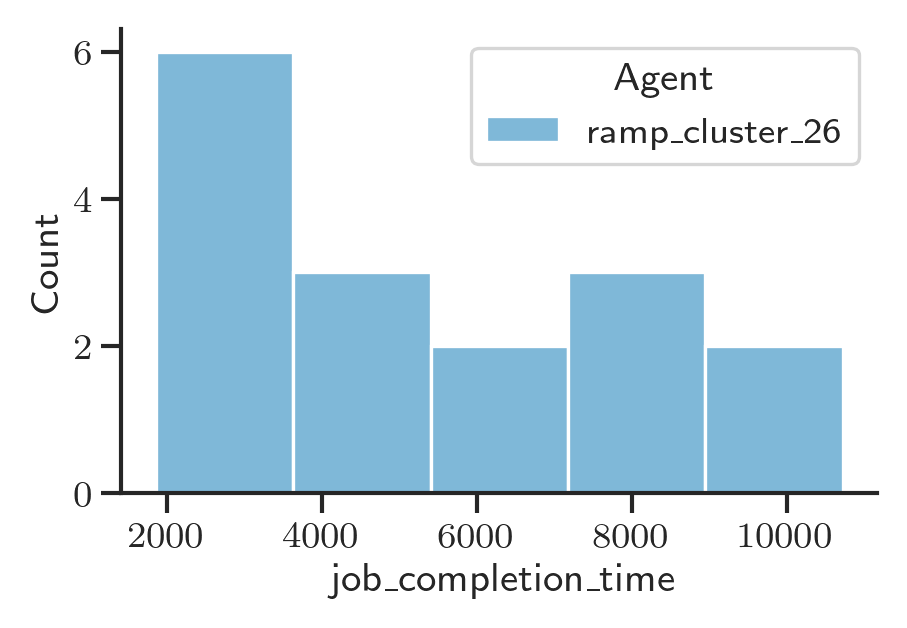

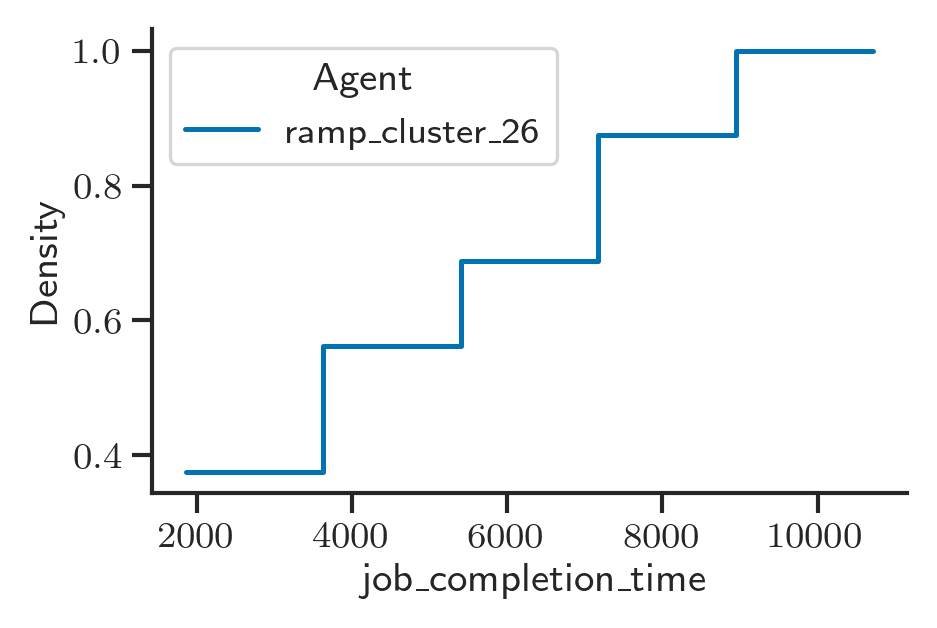

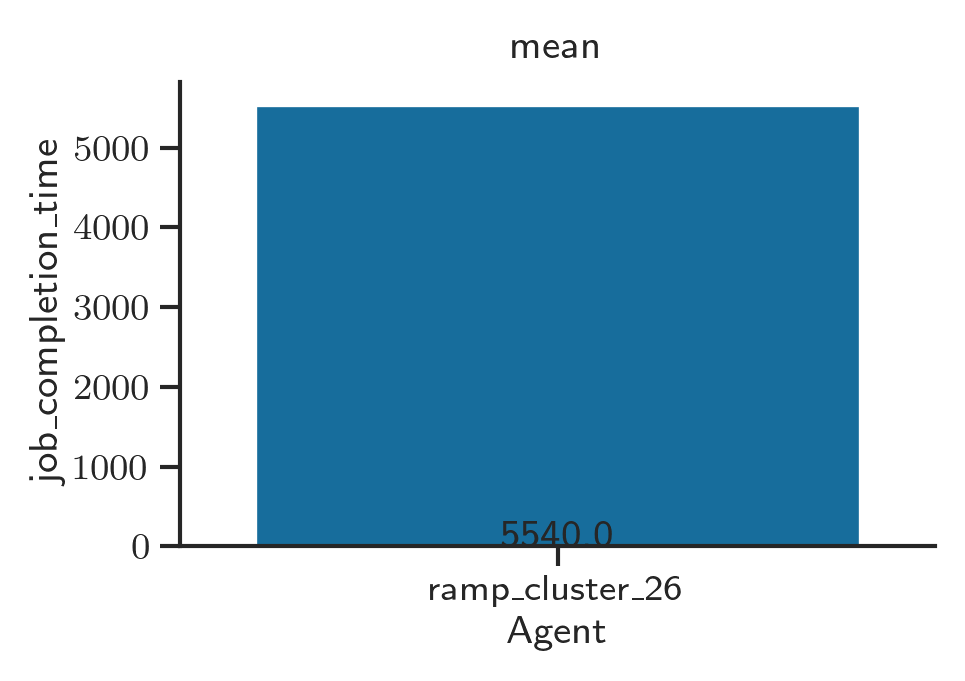

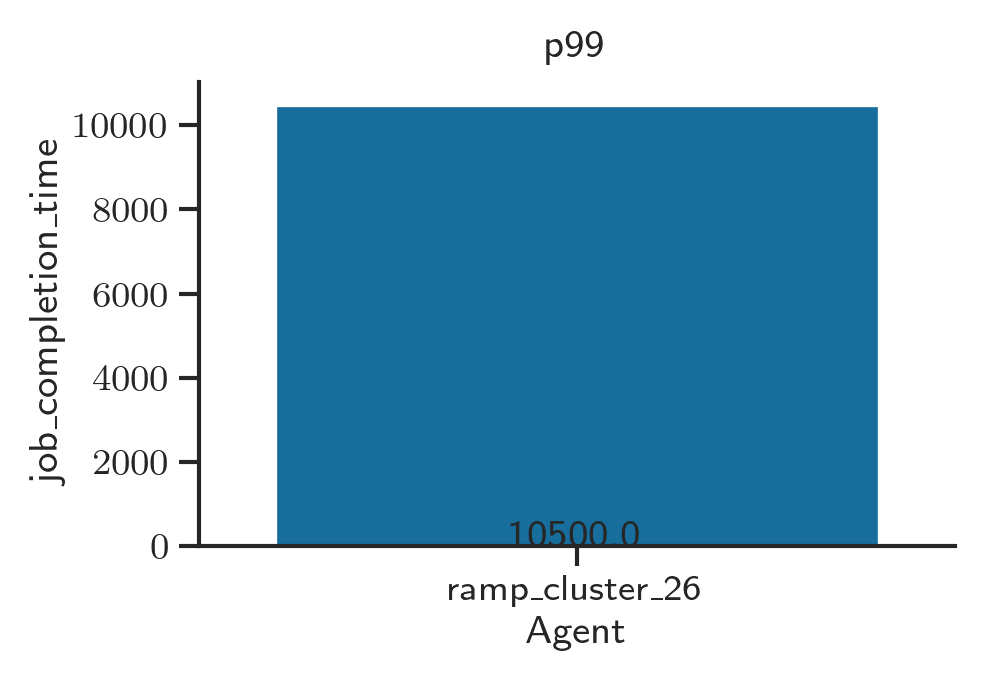

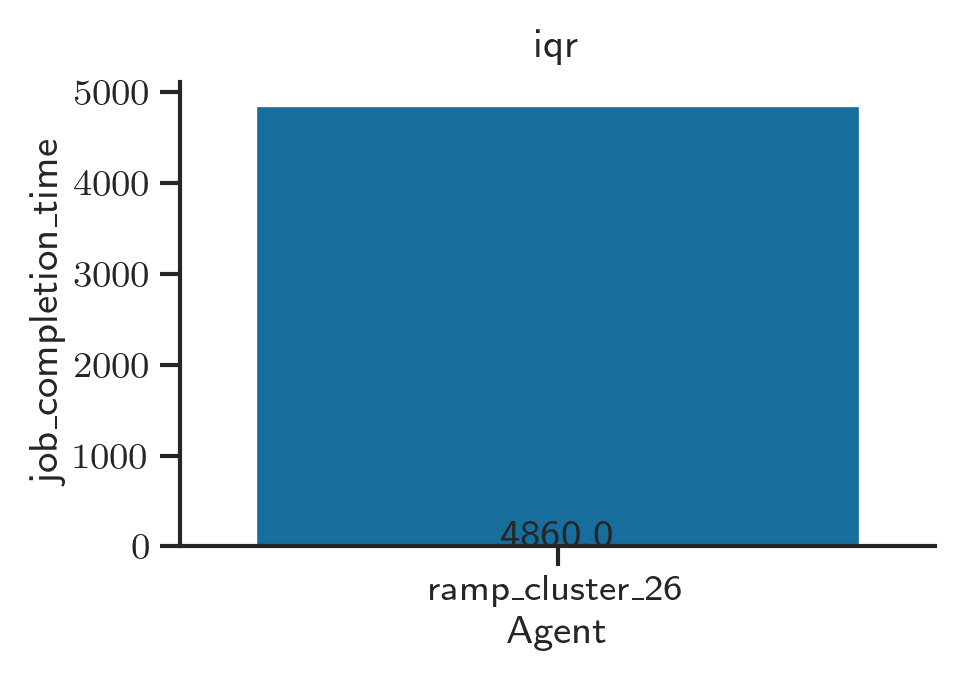

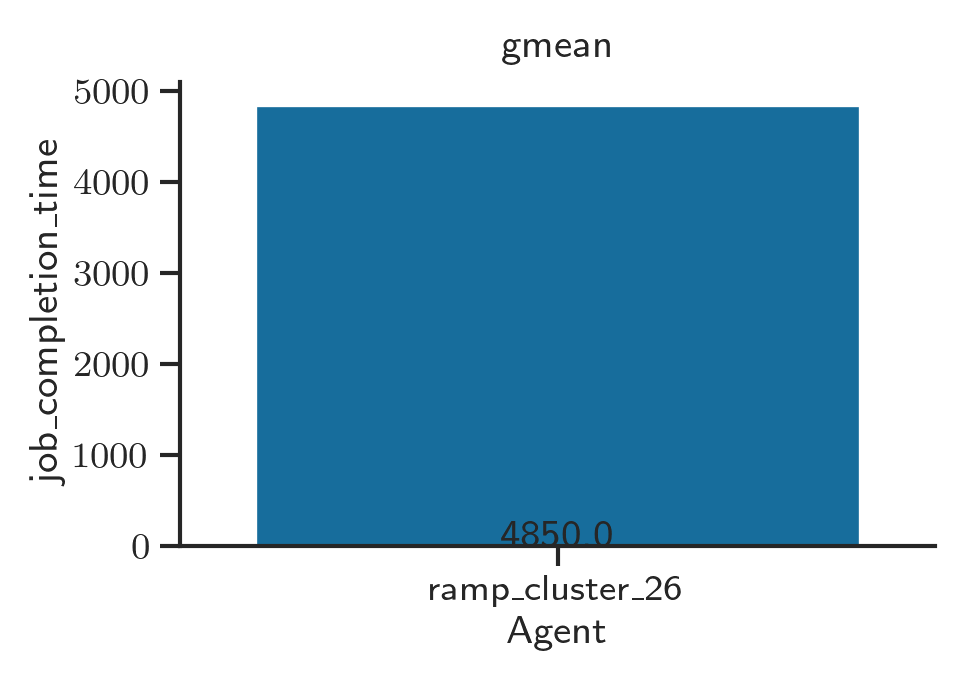

Plotting metric jobs_blocked_num_edges


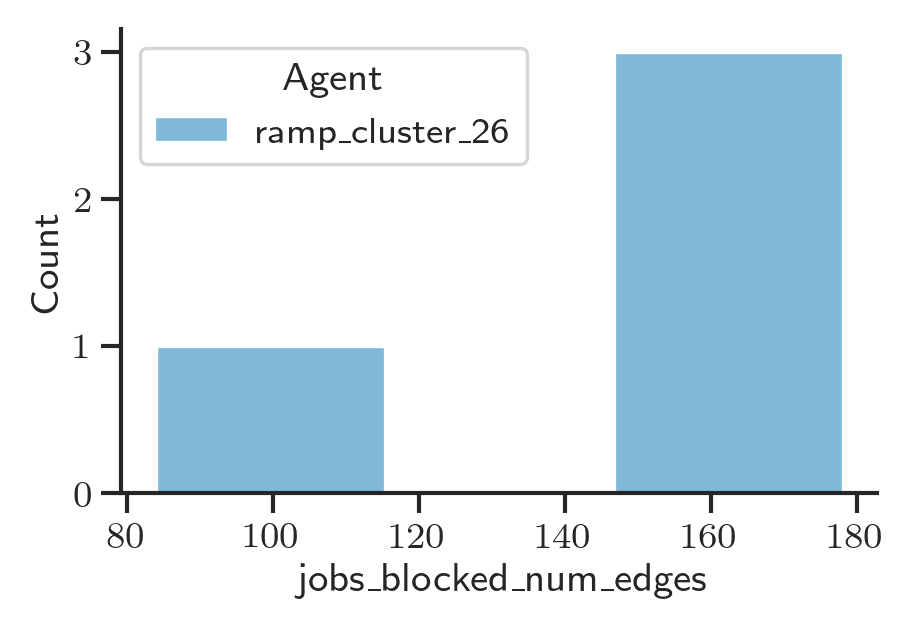

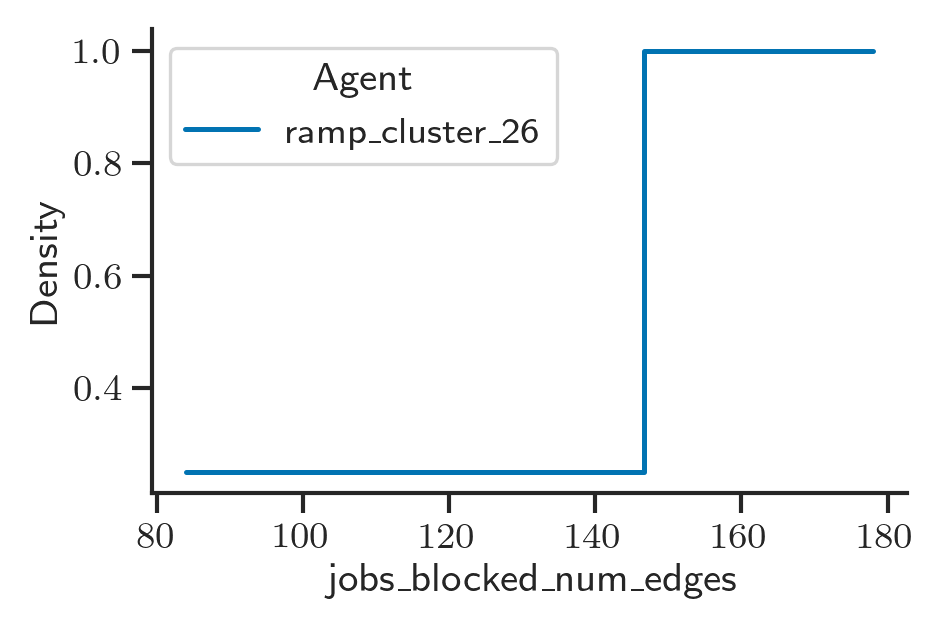

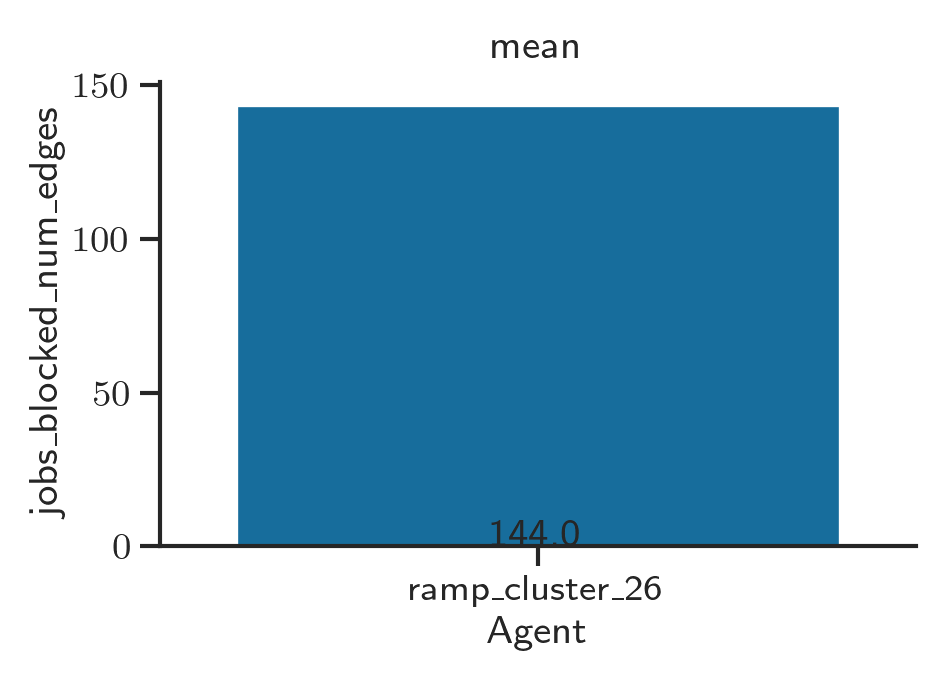

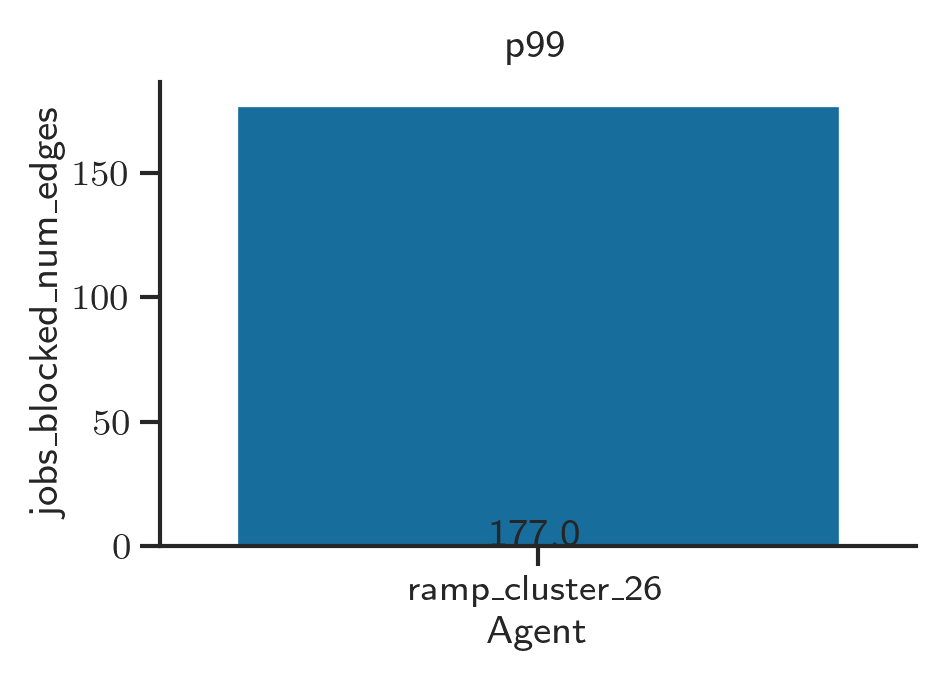

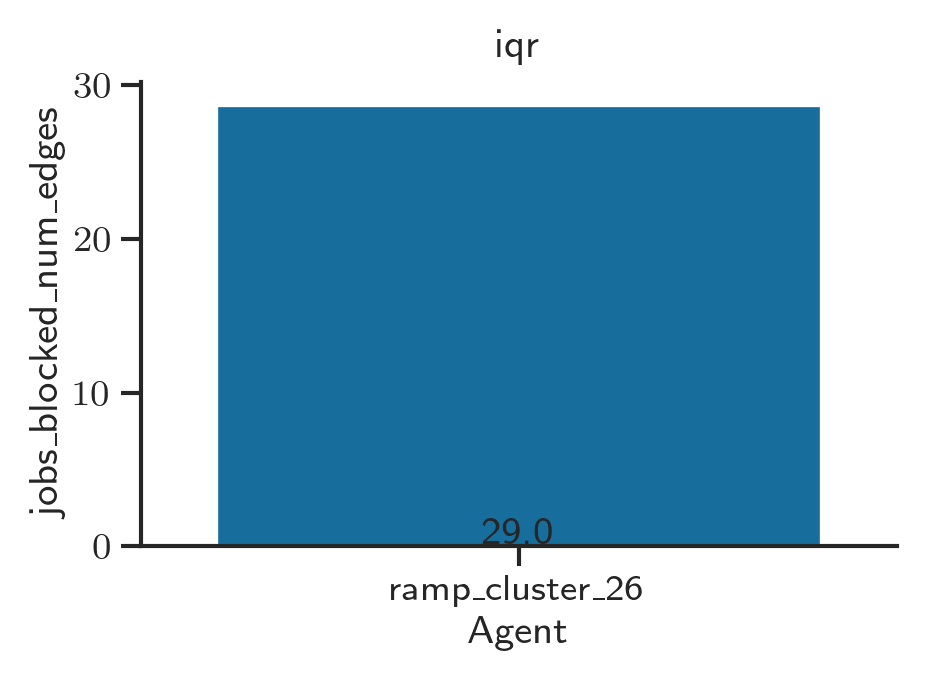

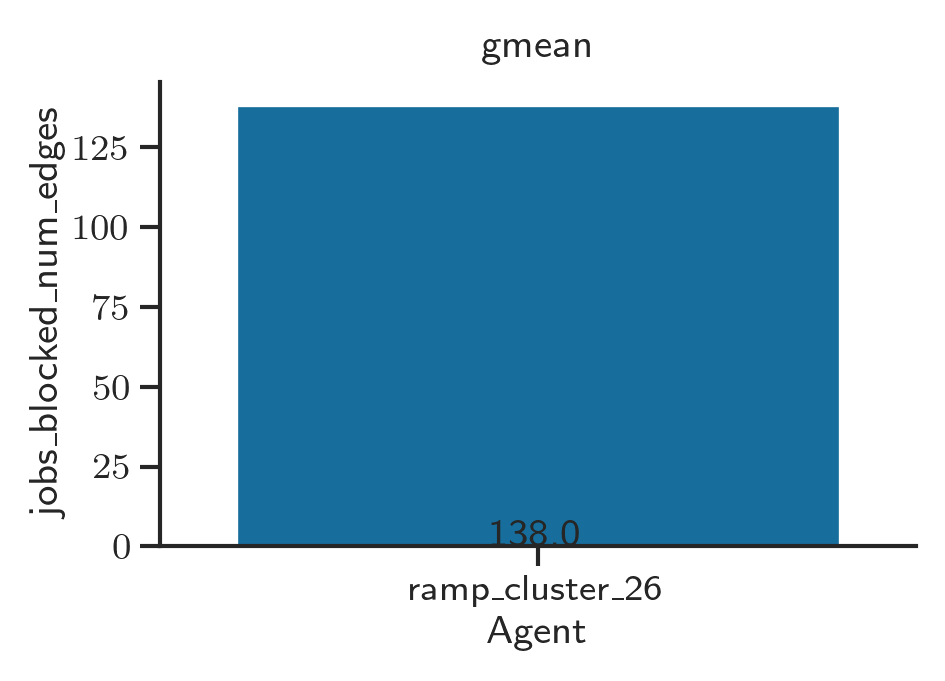

Plotting metric jobs_blocked_num_nodes


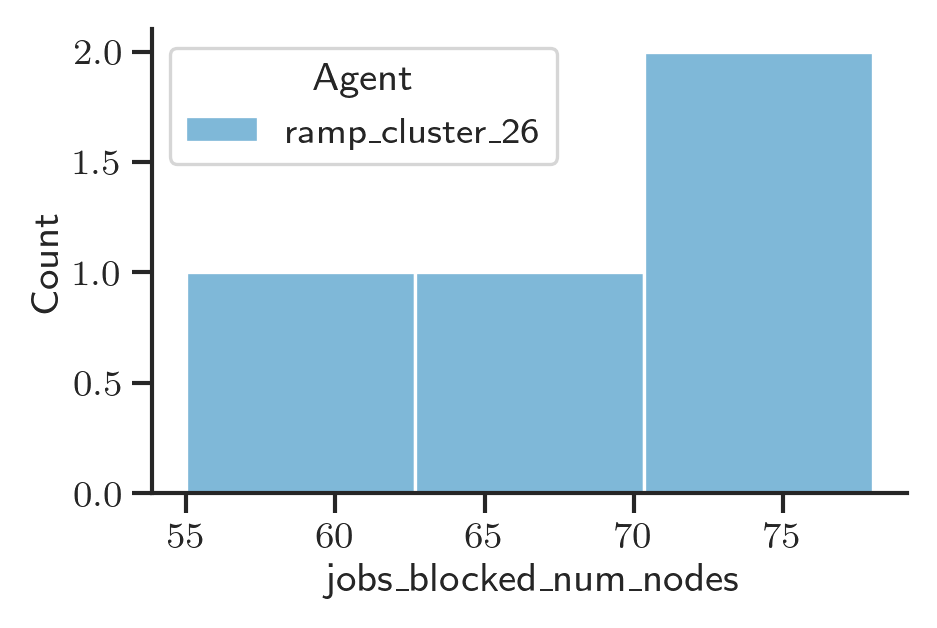

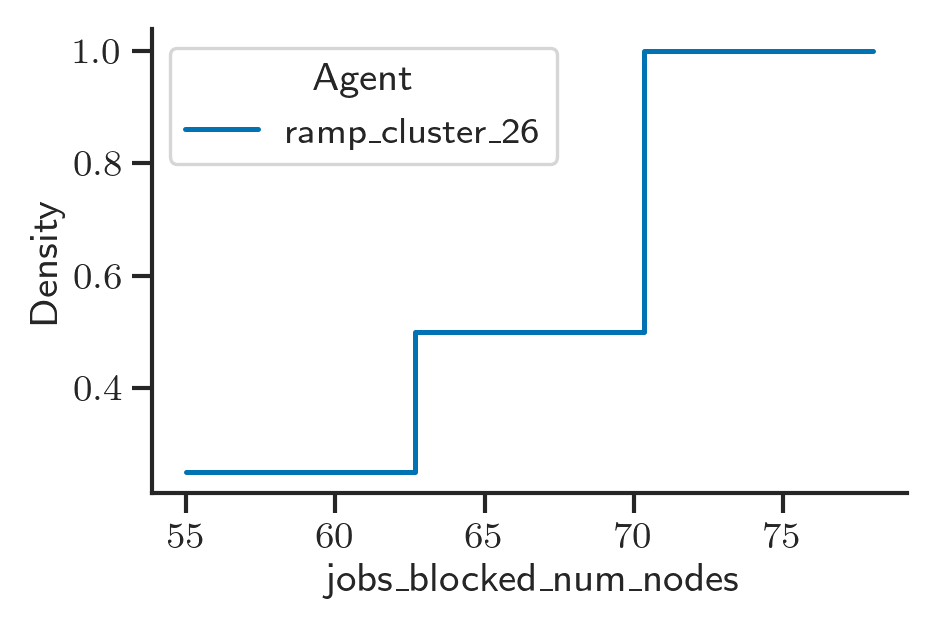

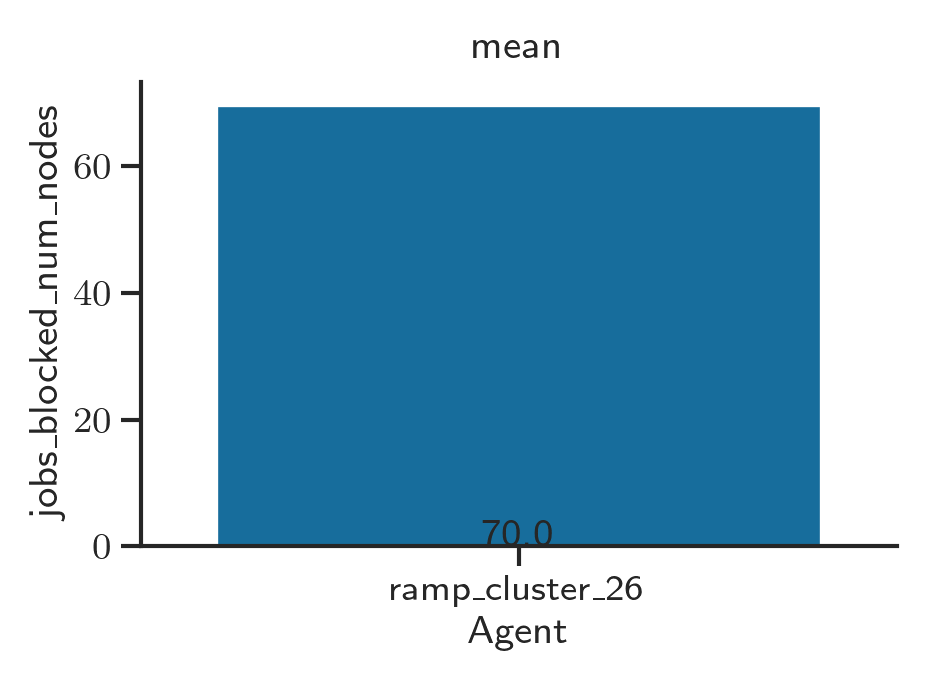

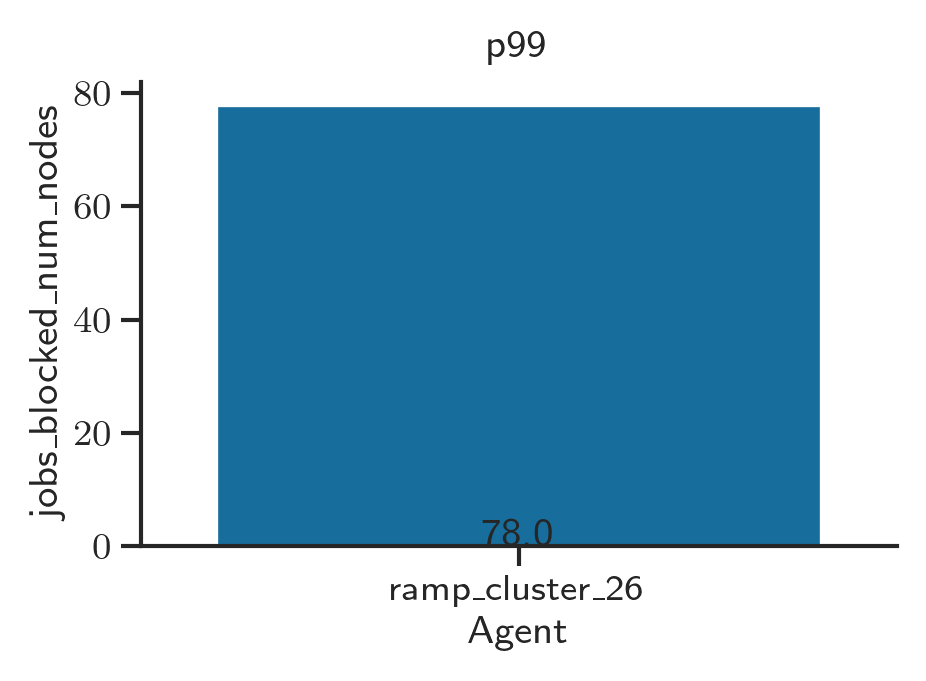

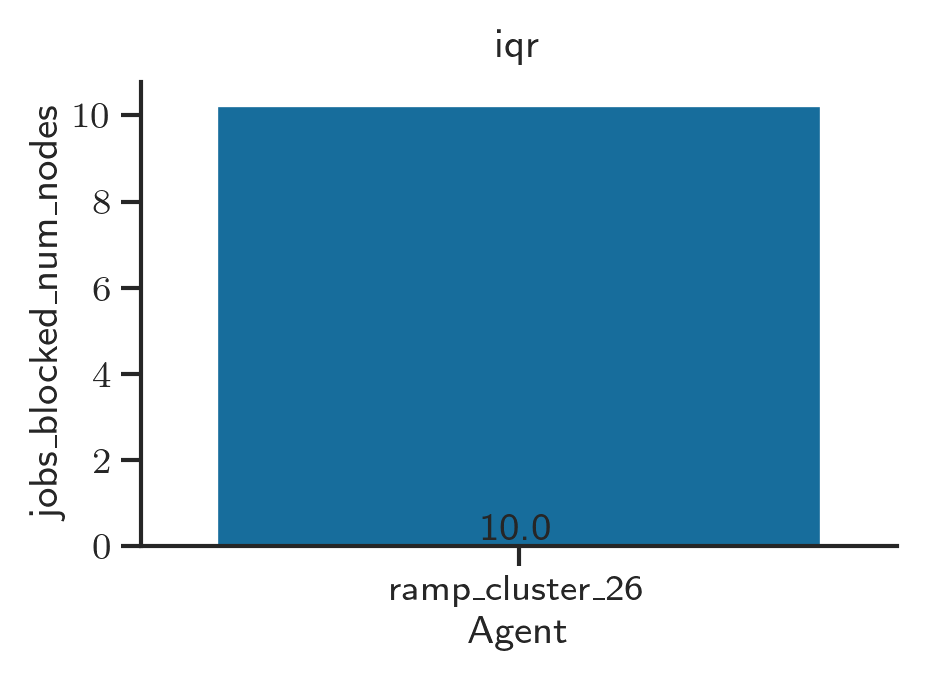

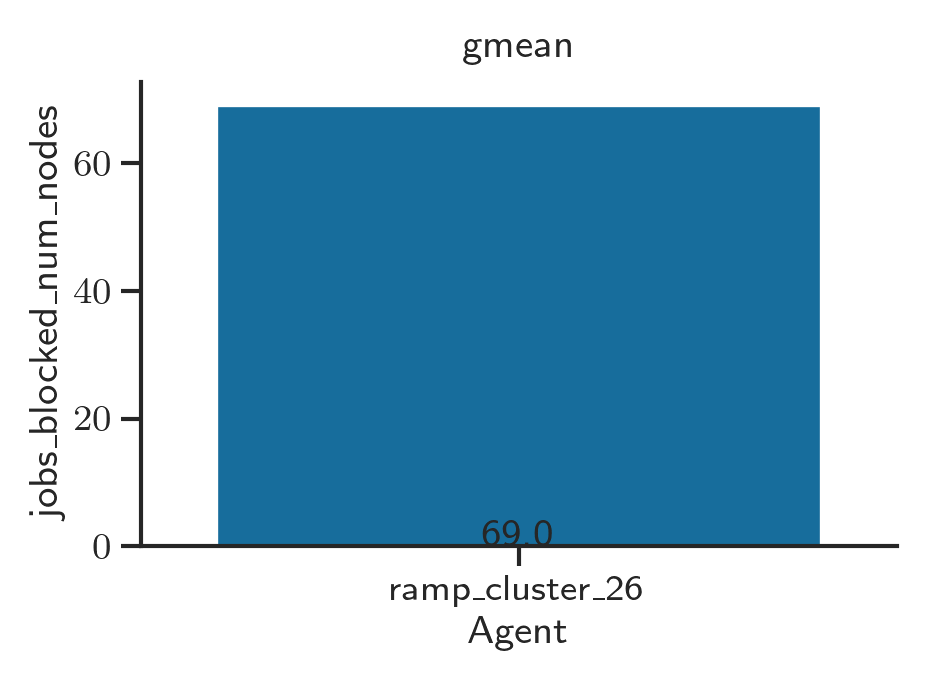

Plotting metric jobs_blocked_total_dependency_size


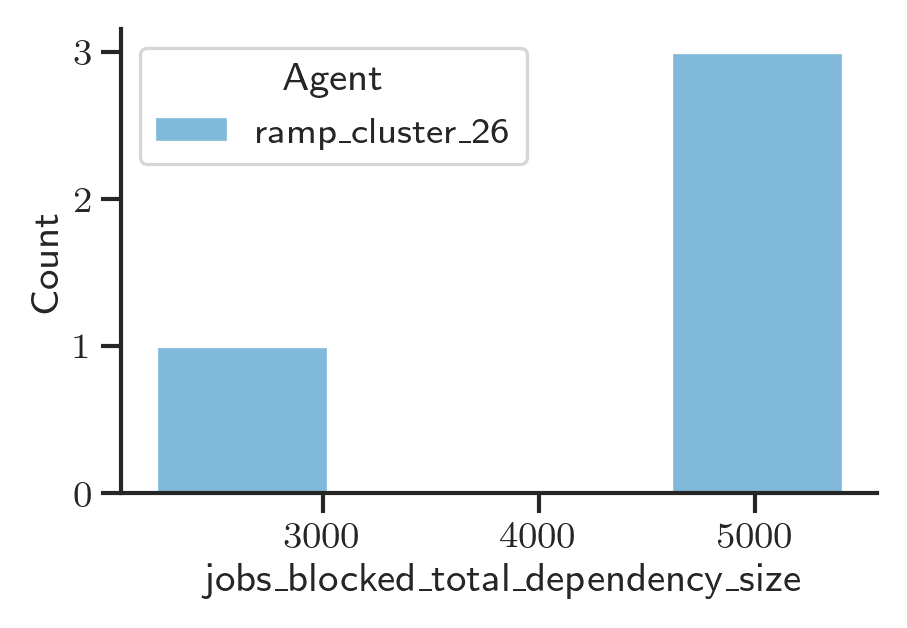

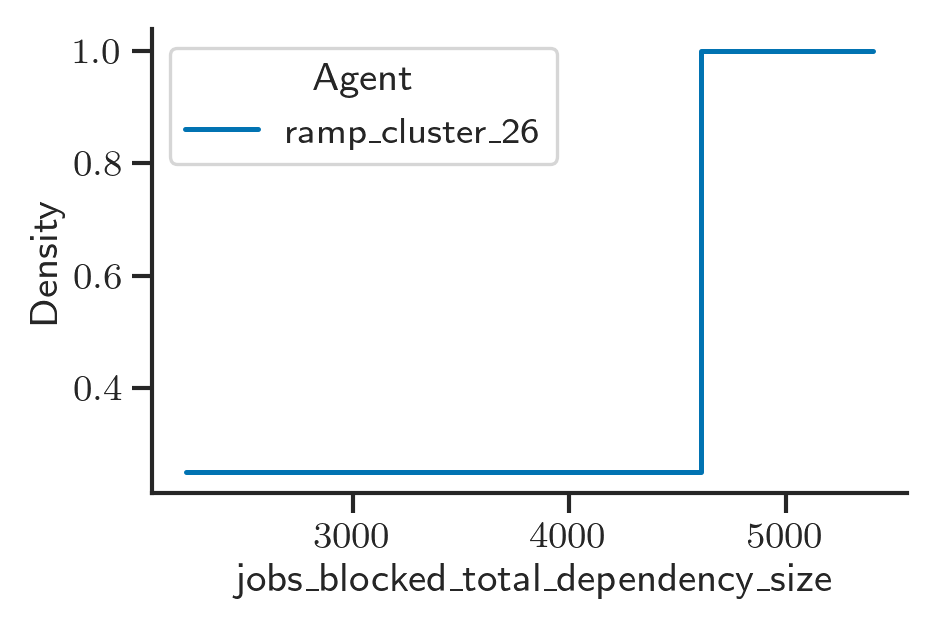

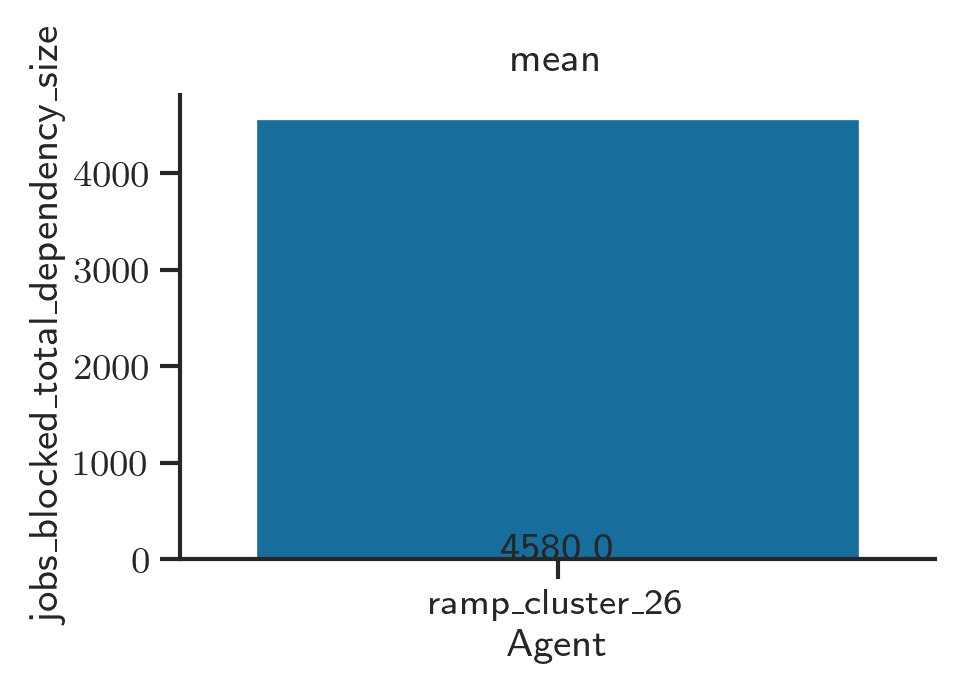

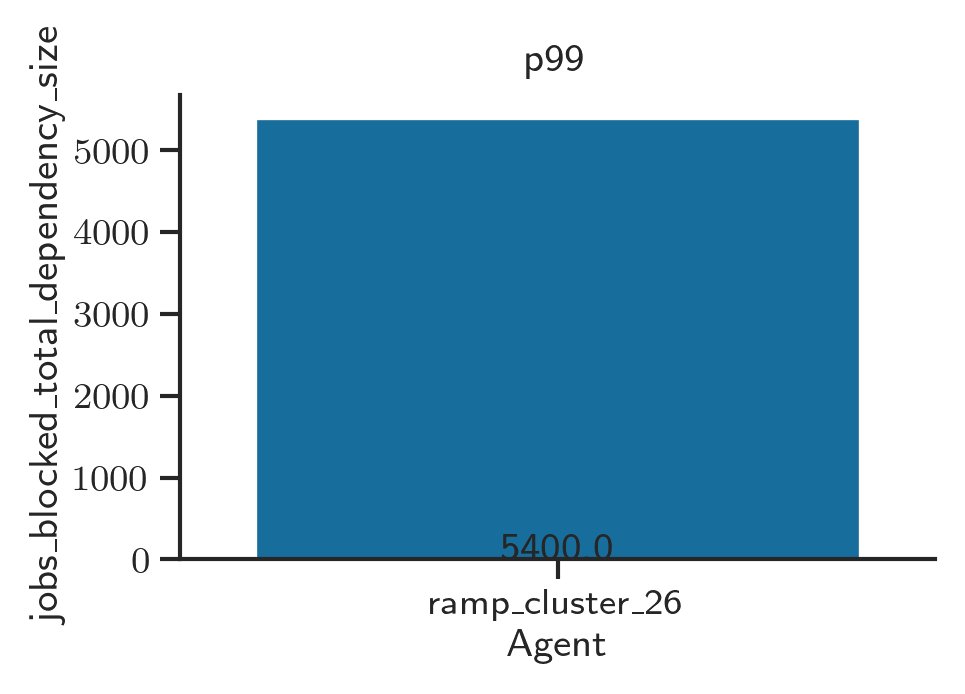

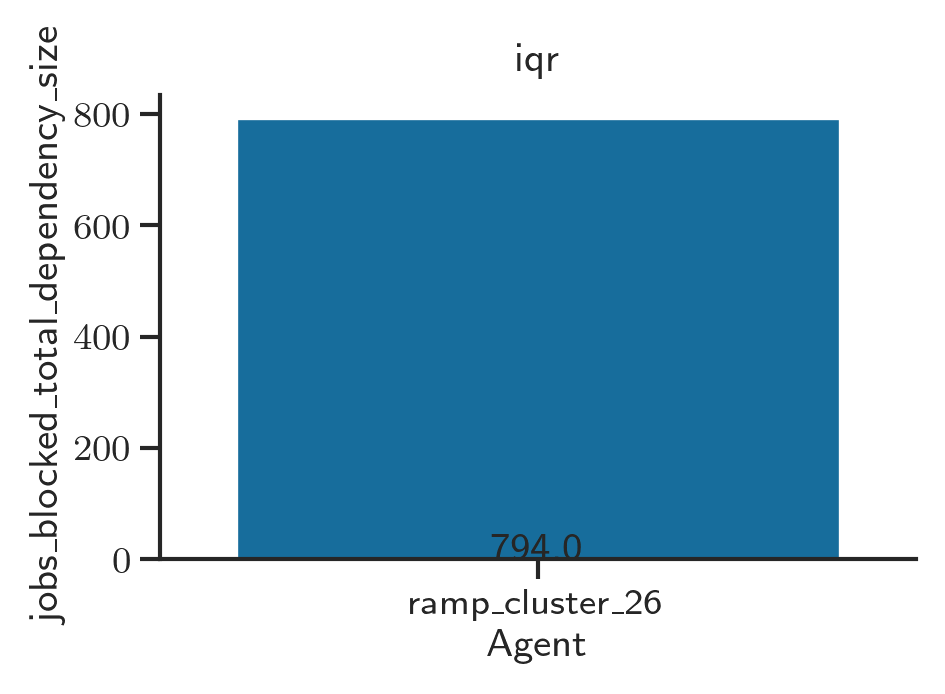

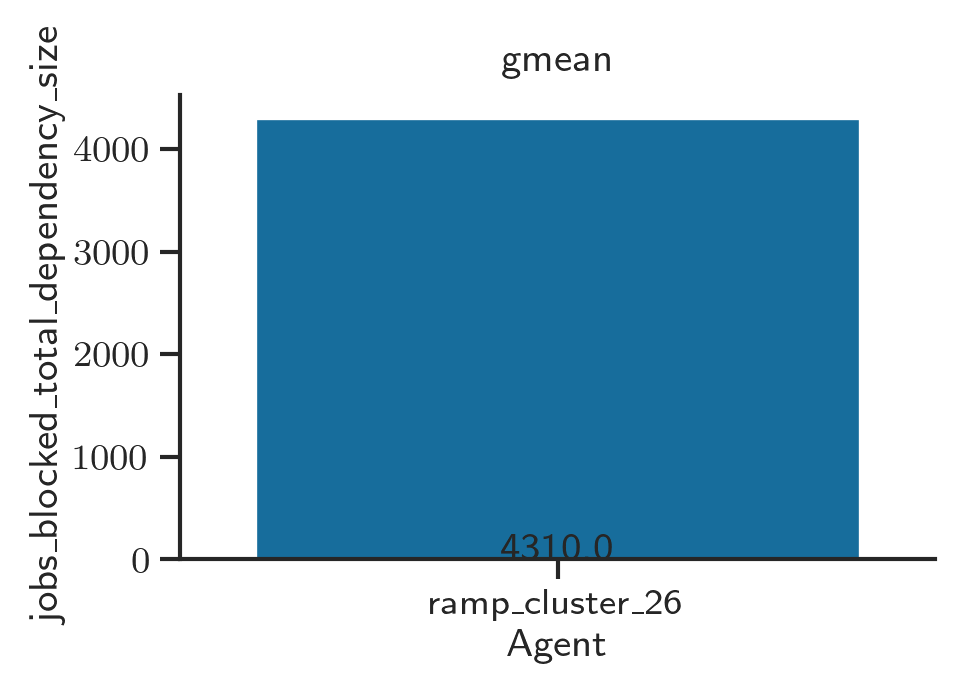

Plotting metric jobs_blocked_total_operation_memory_cost


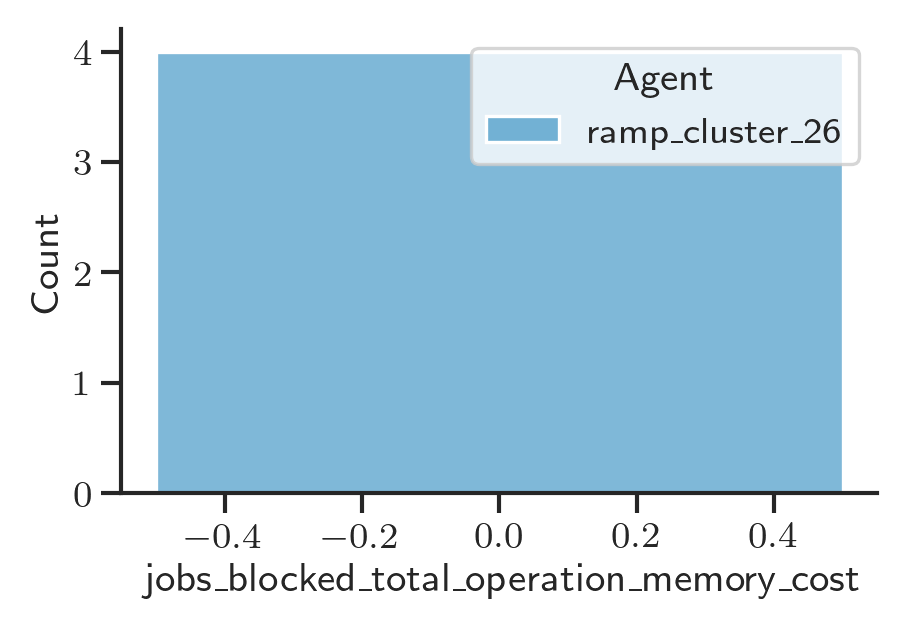

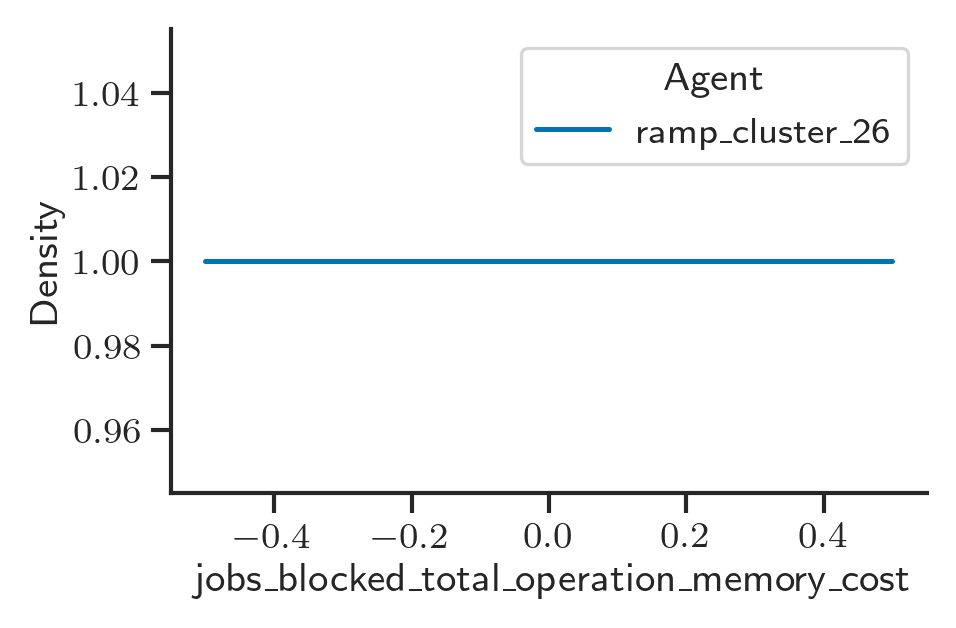

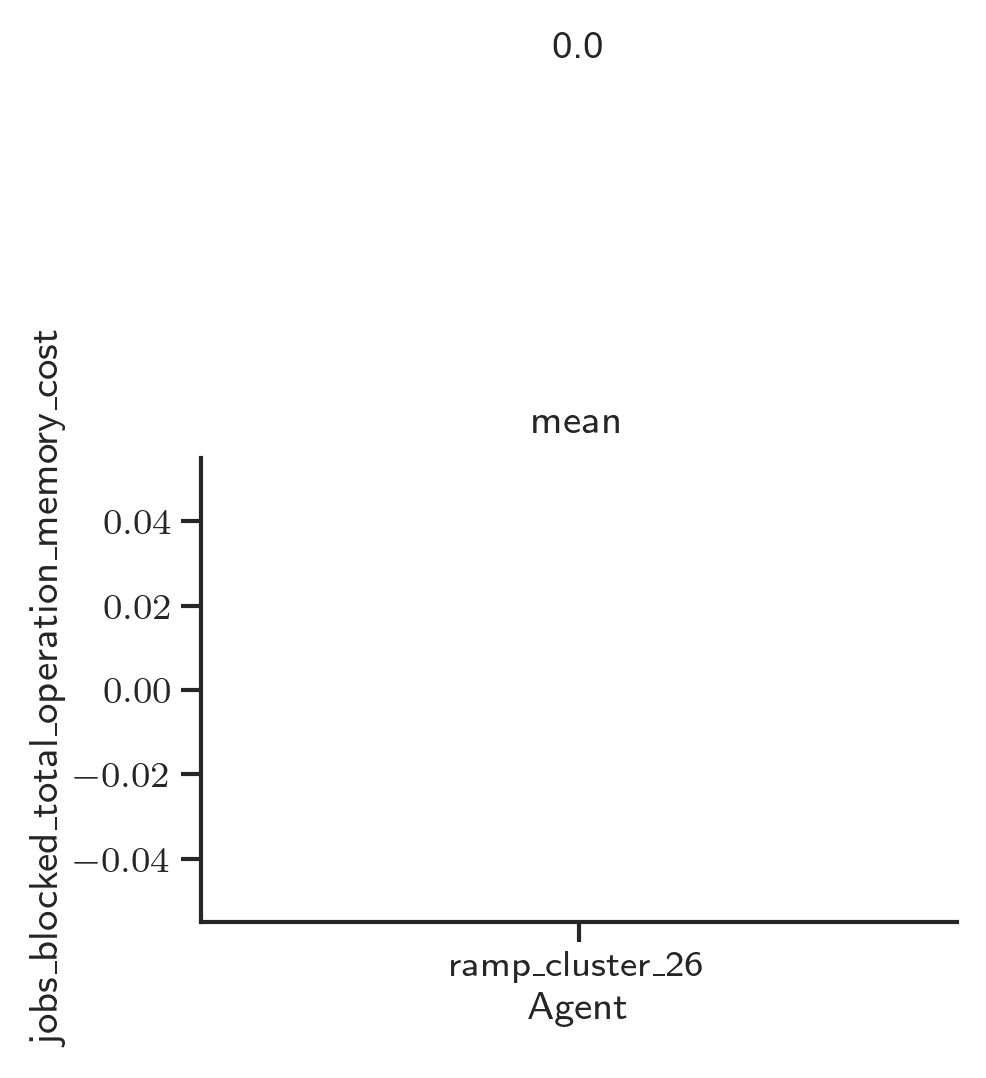

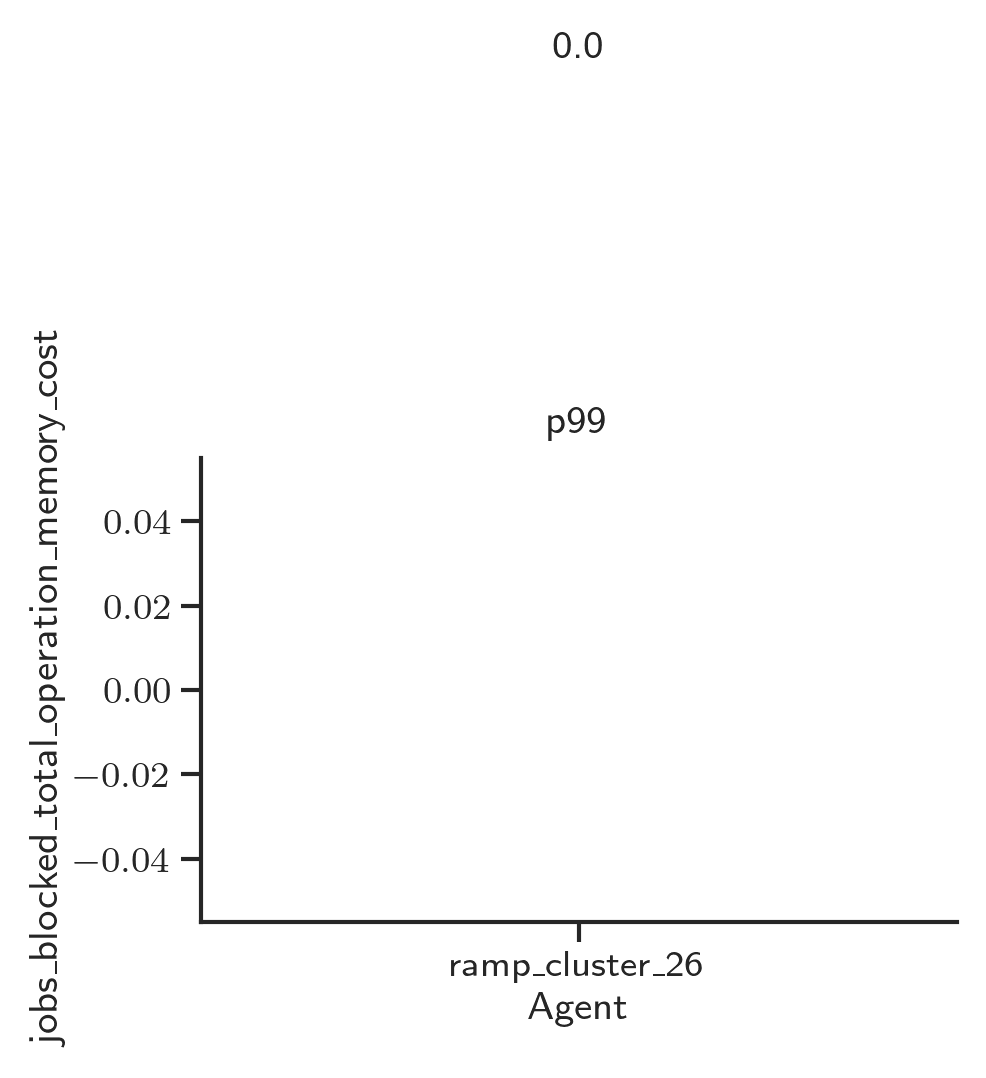

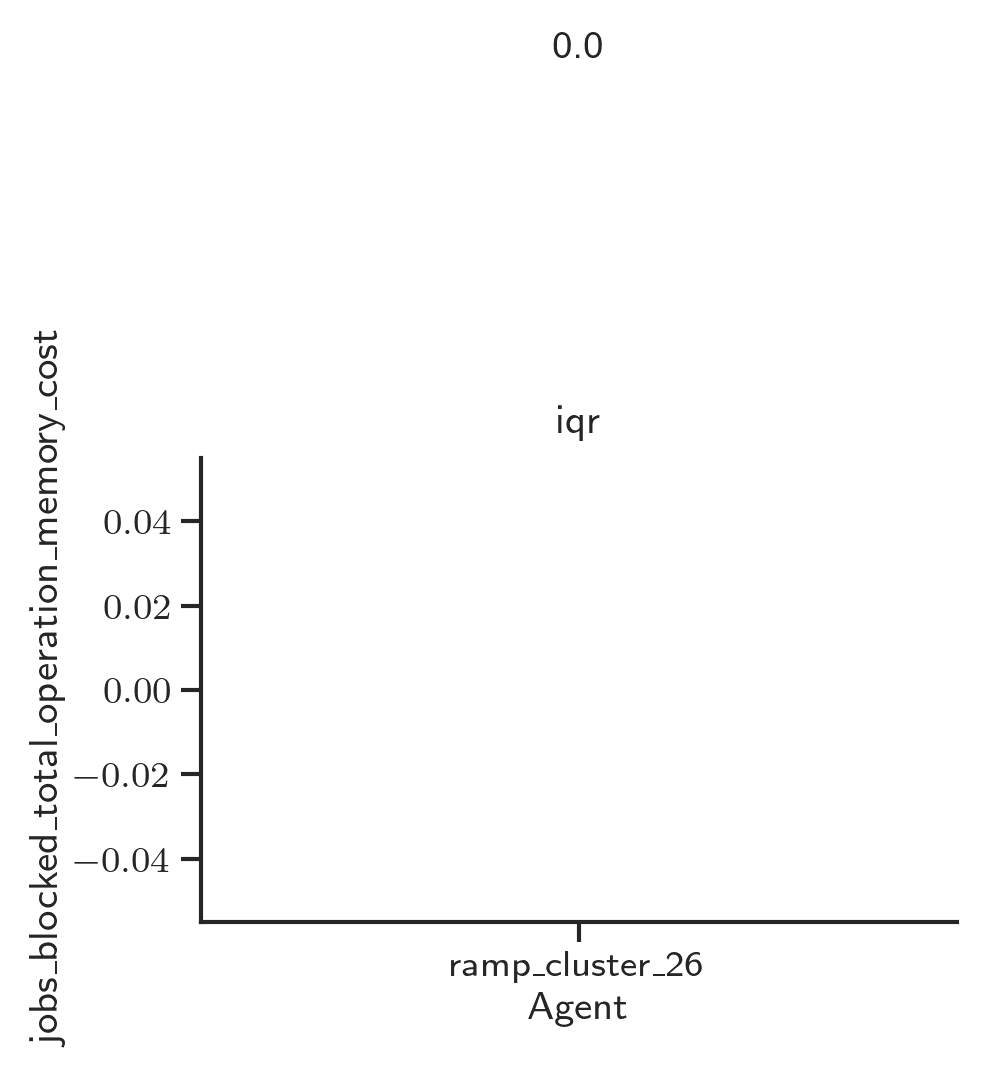

/scratch/zciccwf/py36/envs/ddls/lib/python3.9/site-packages/scipy/stats/stats.py:275: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


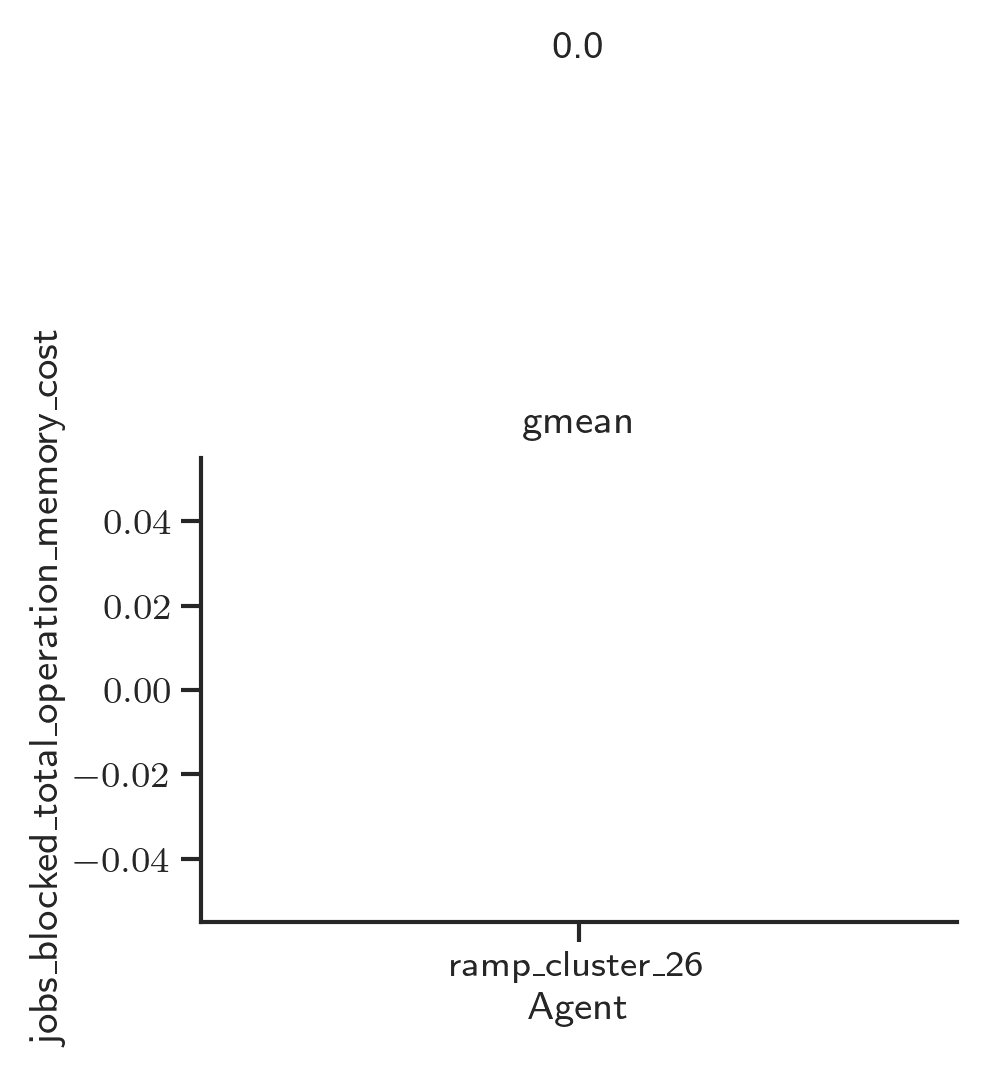

Plotting metric jobs_completed_num_edges


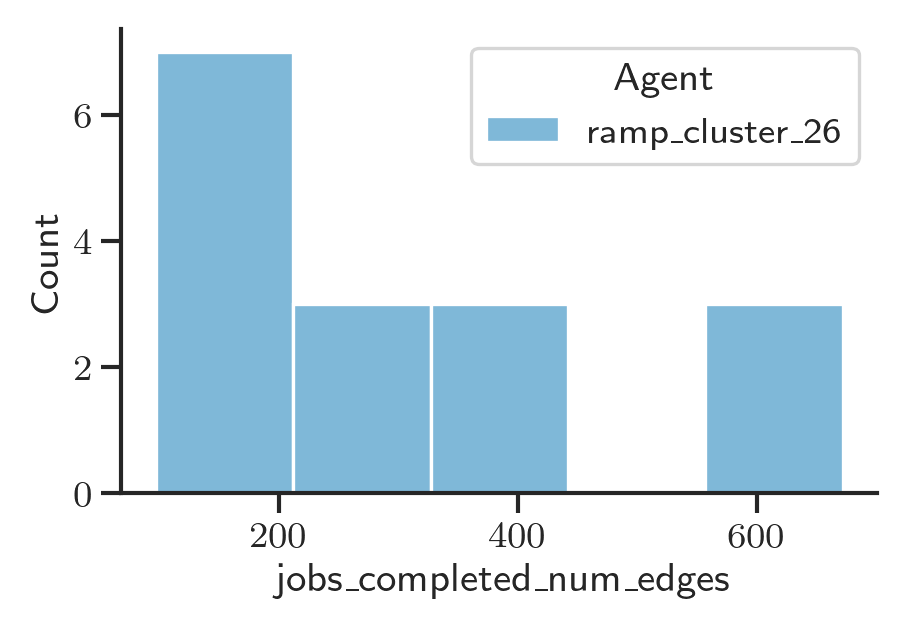

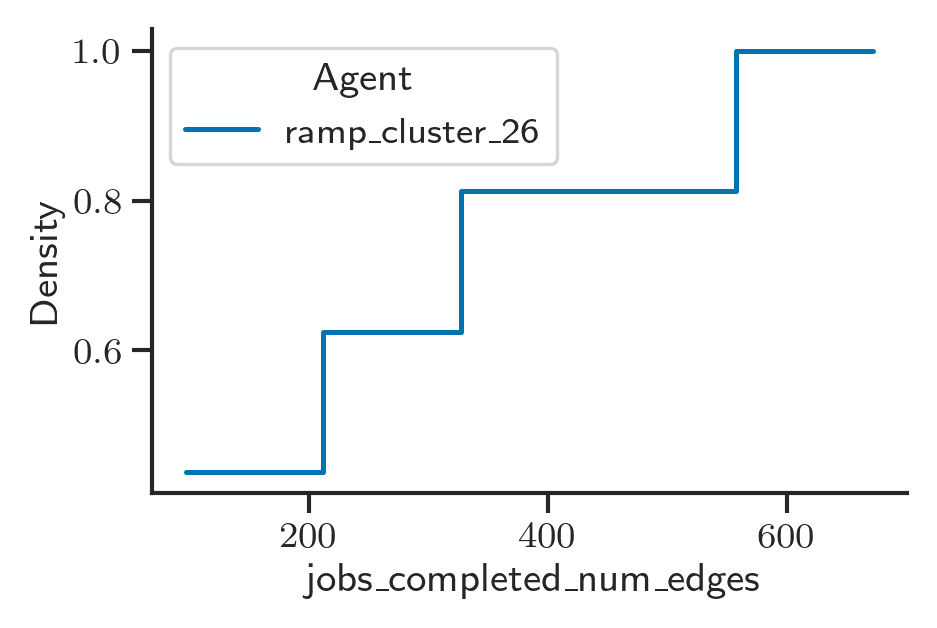

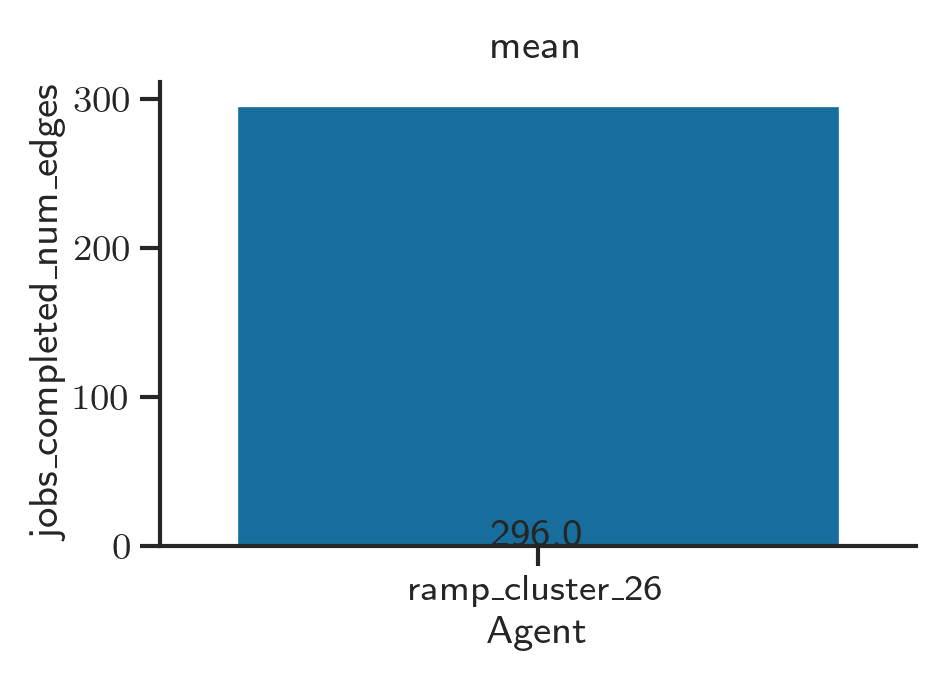

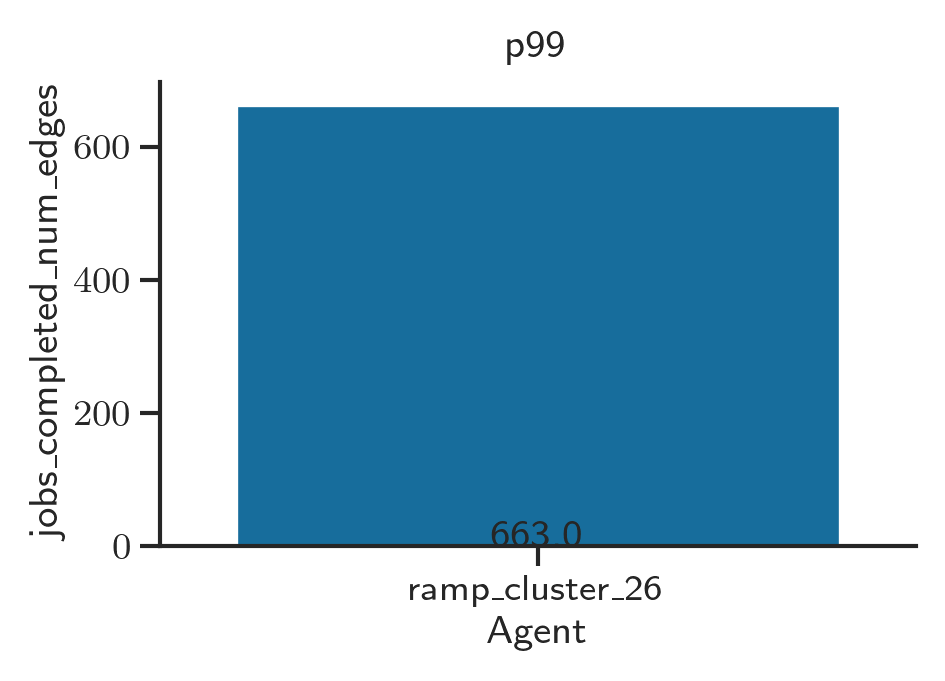

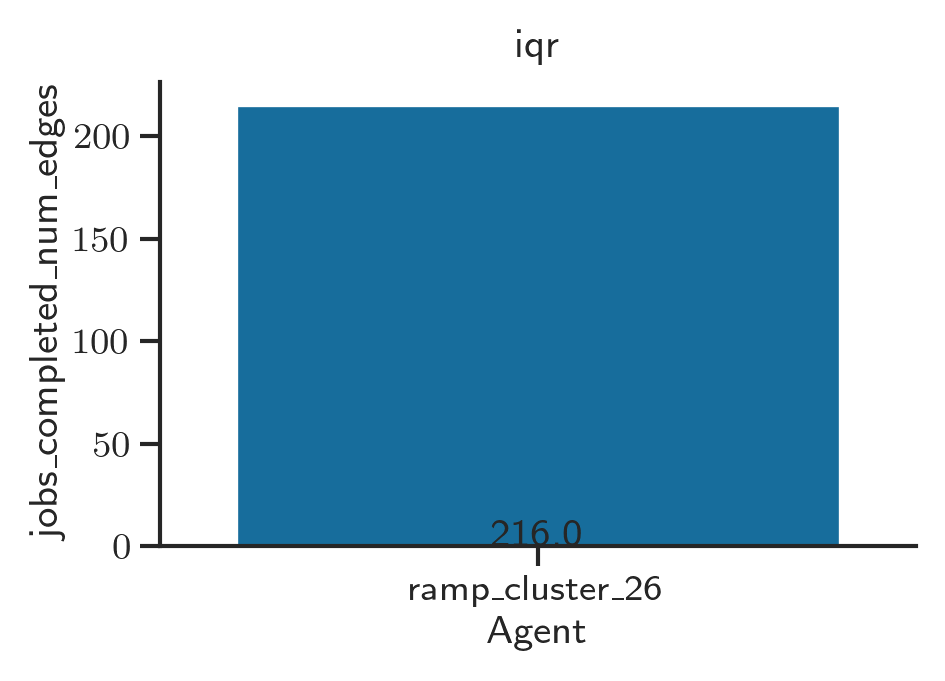

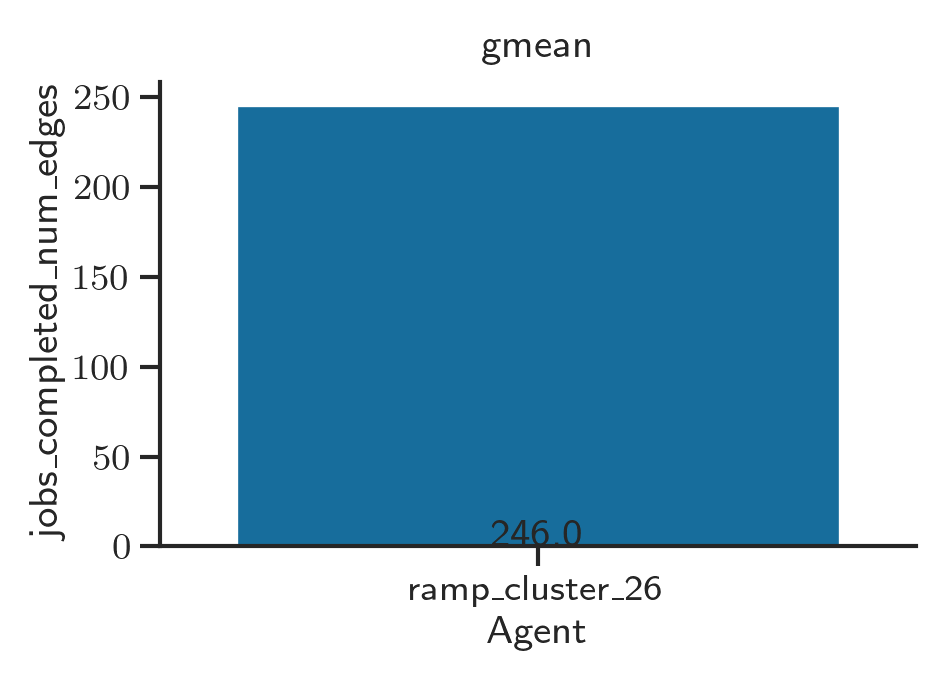

Plotting metric jobs_completed_num_nodes


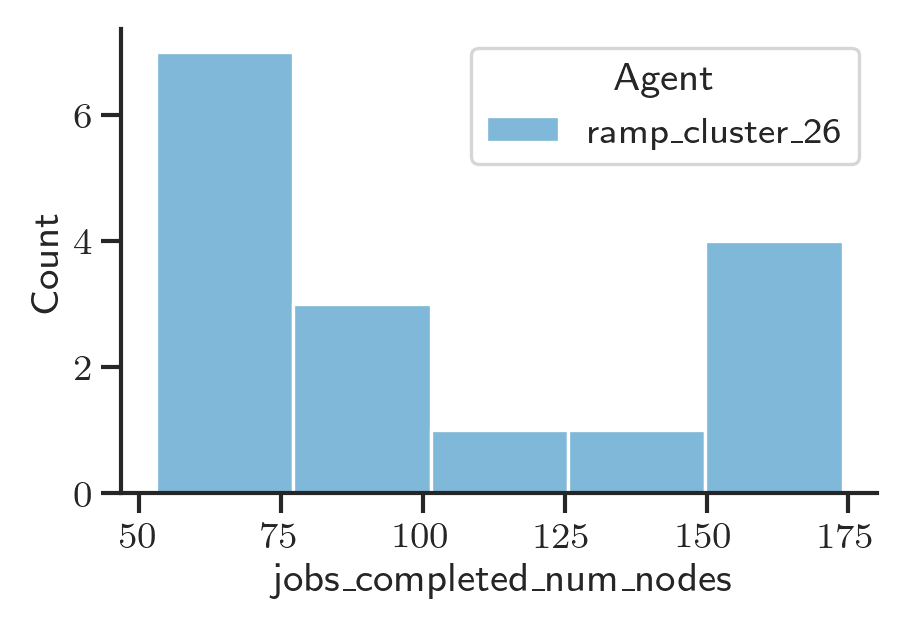

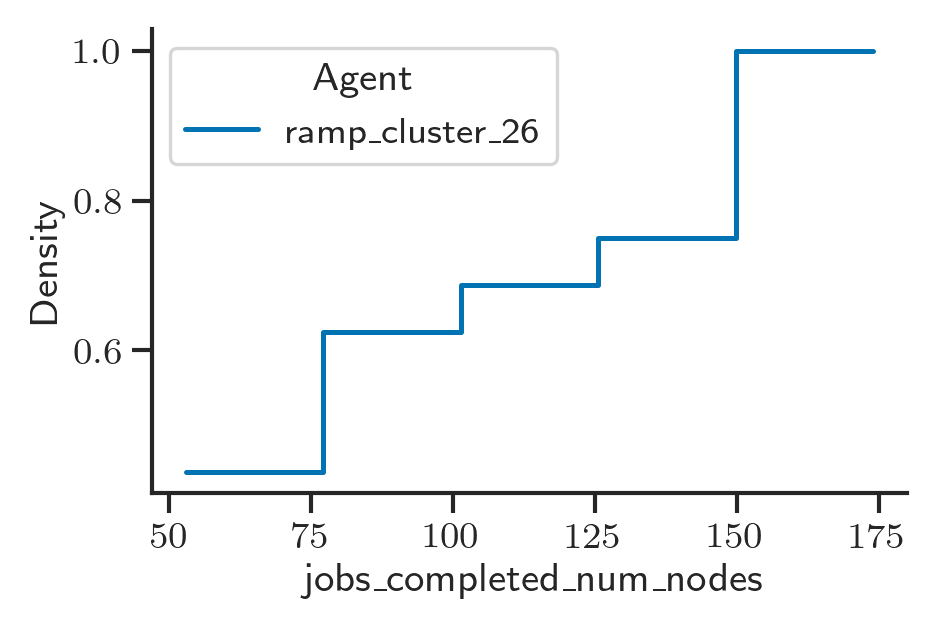

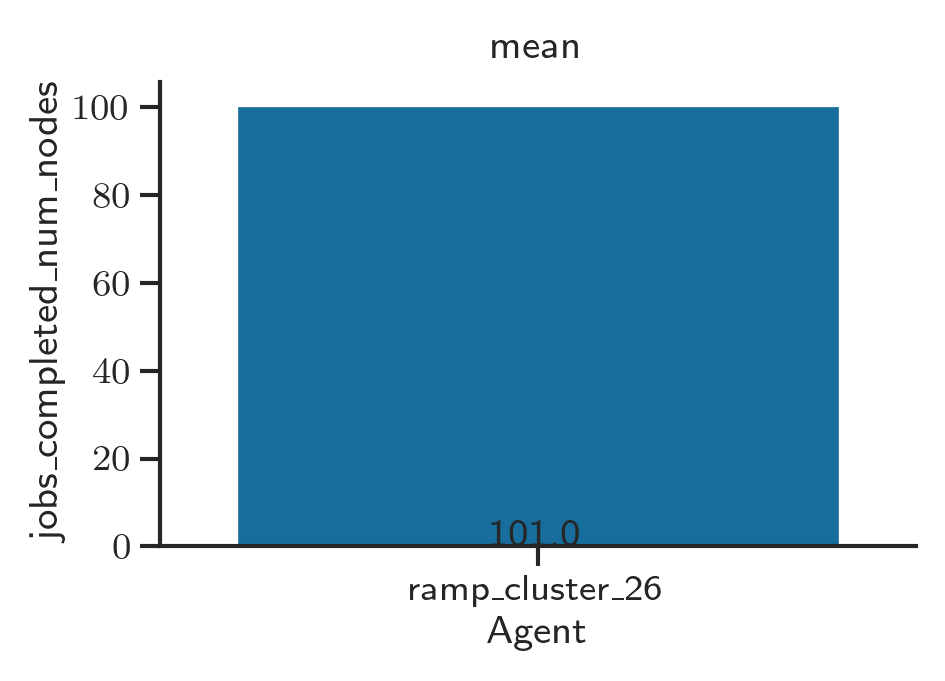

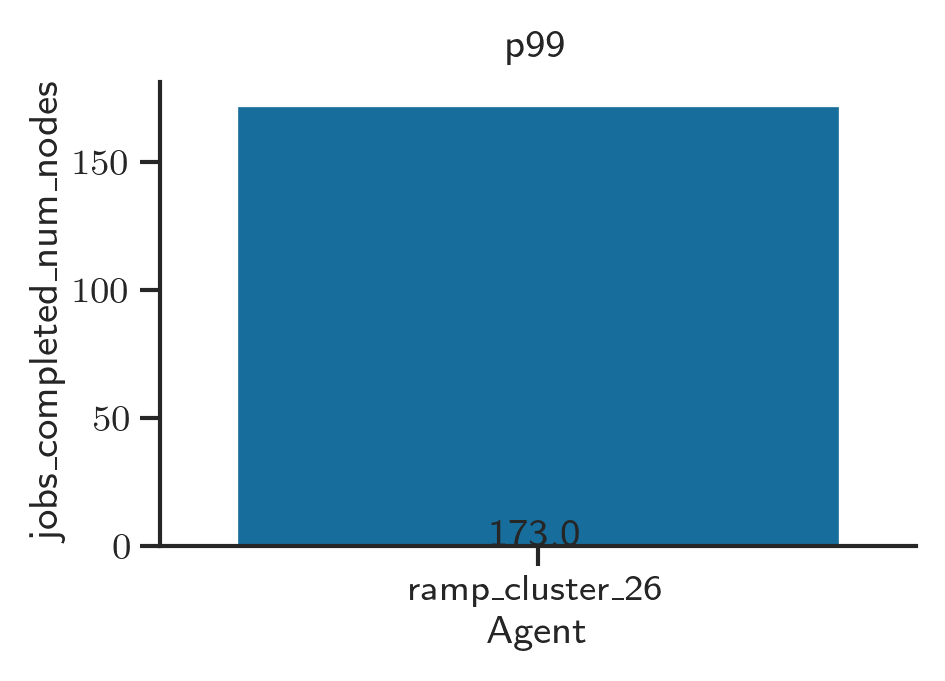

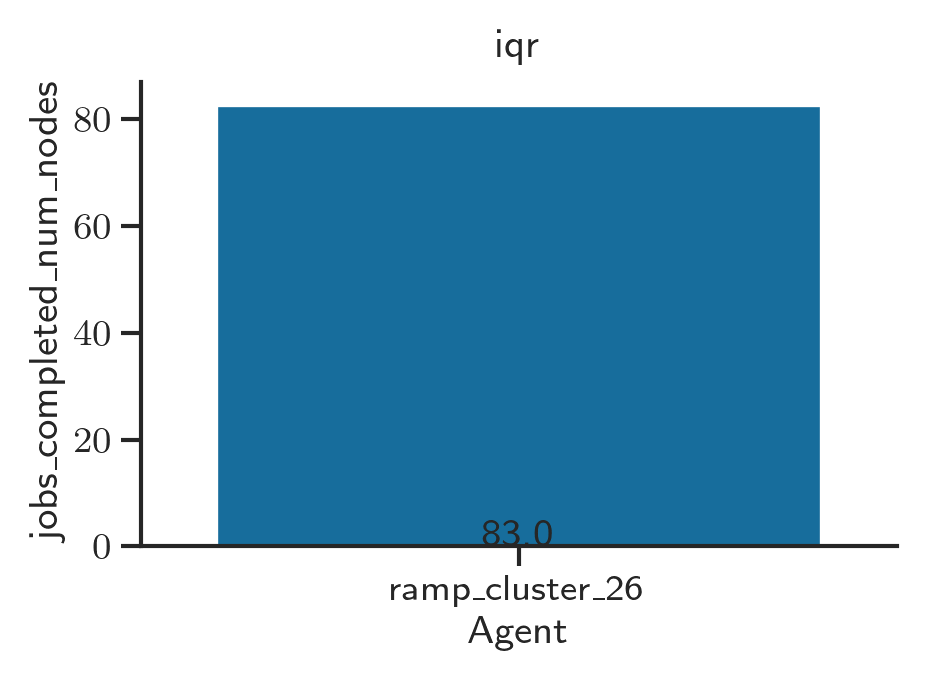

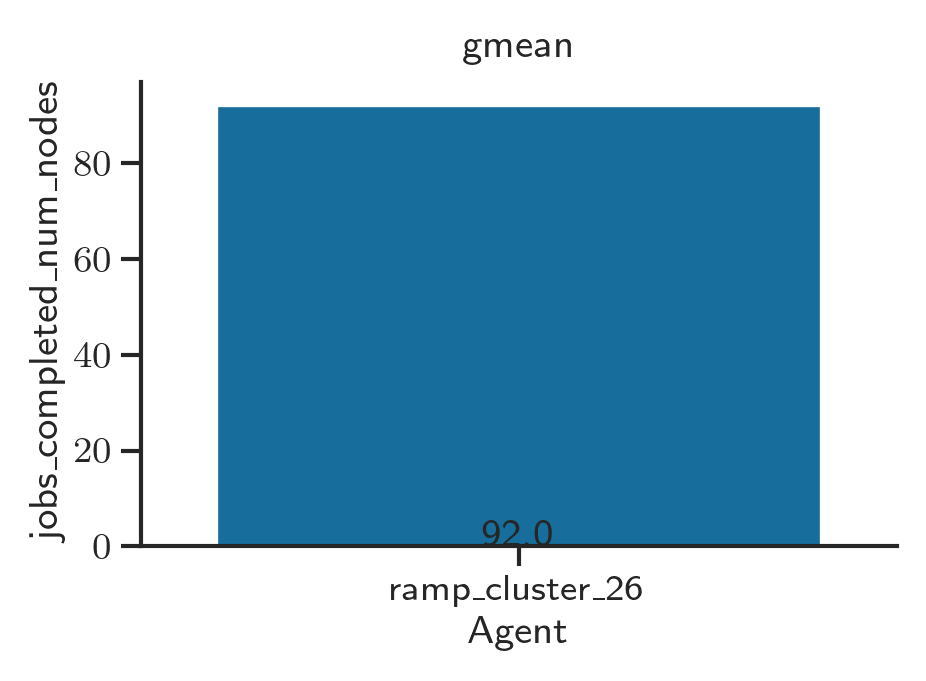

Plotting metric jobs_completed_total_dependency_size


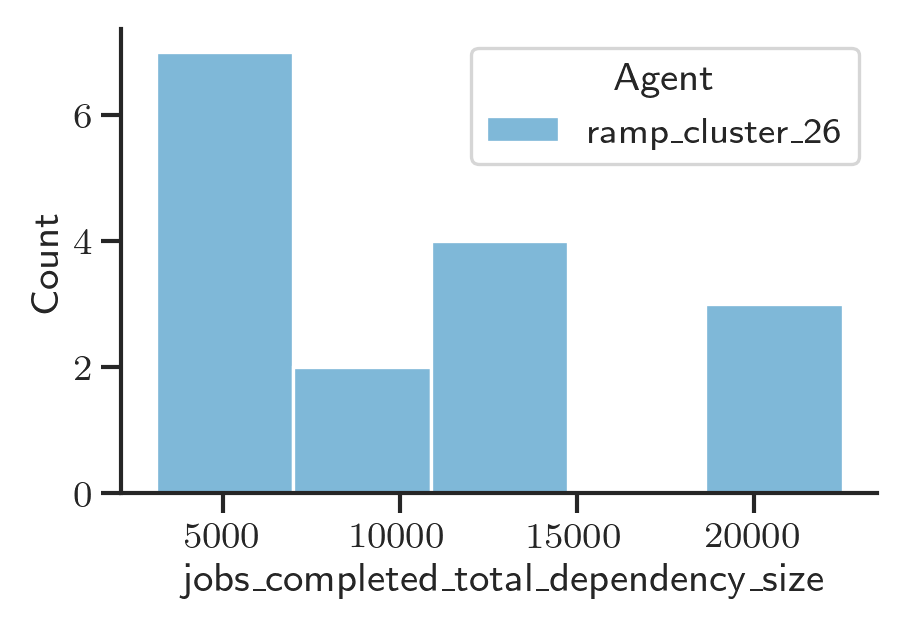

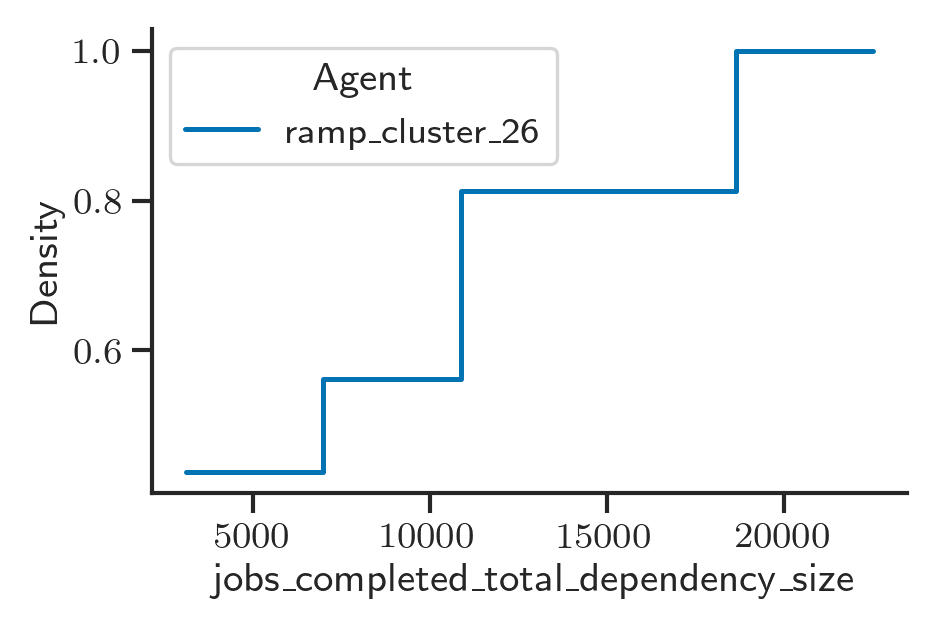

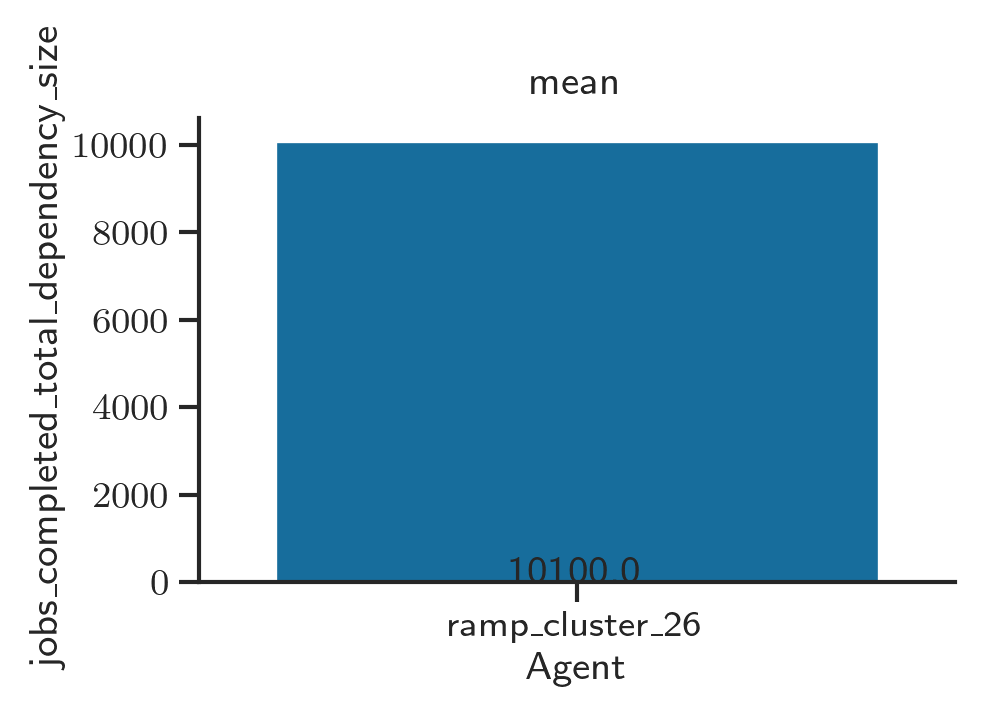

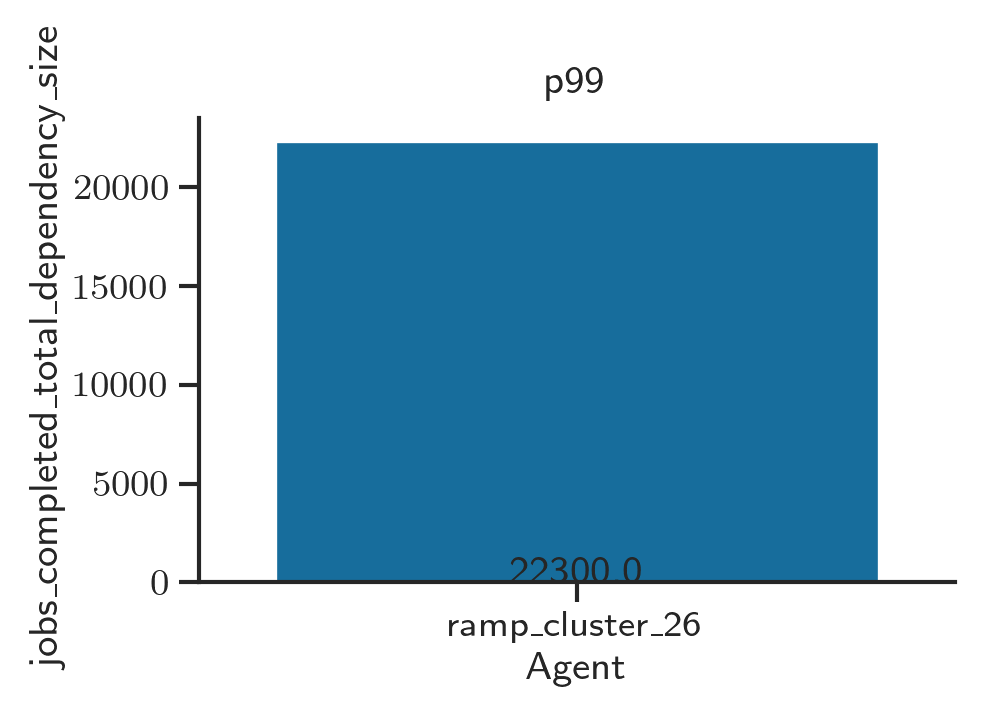

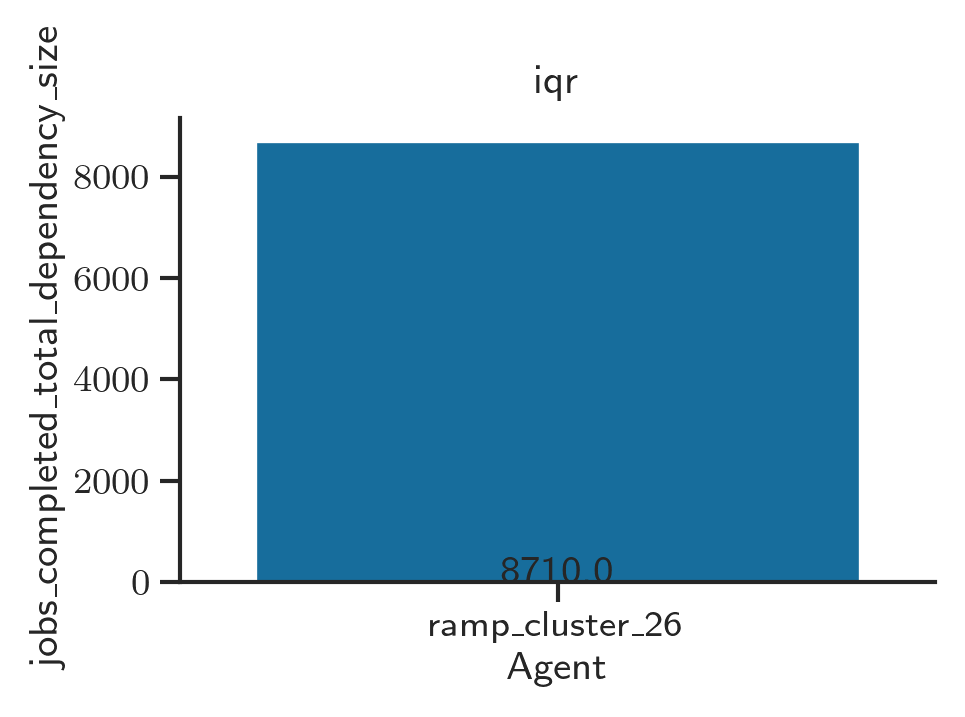

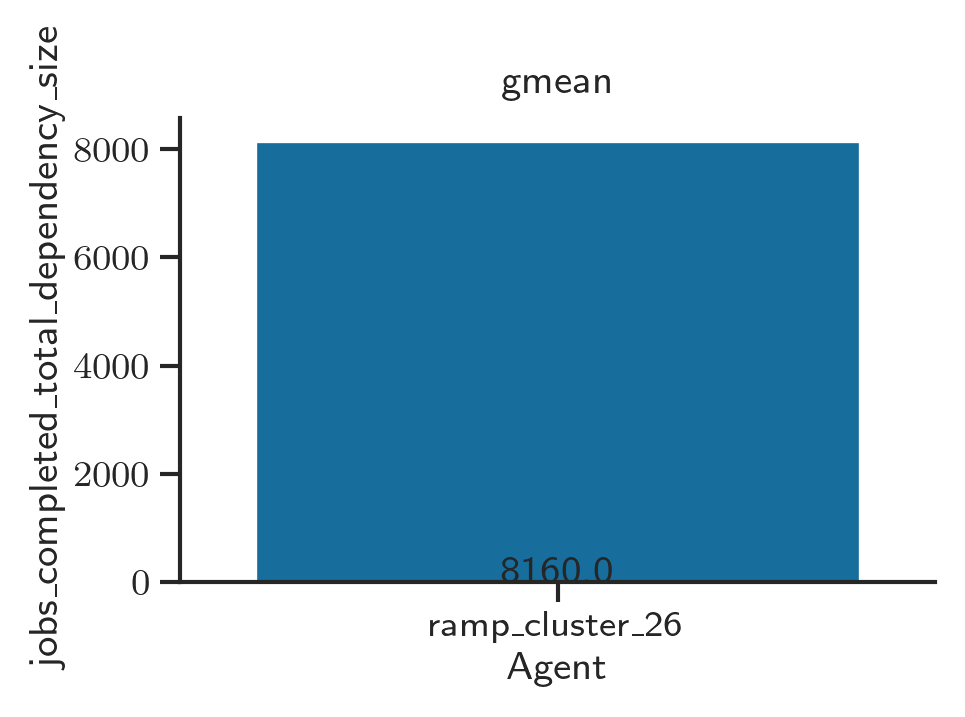

Plotting metric jobs_completed_total_operation_memory_cost


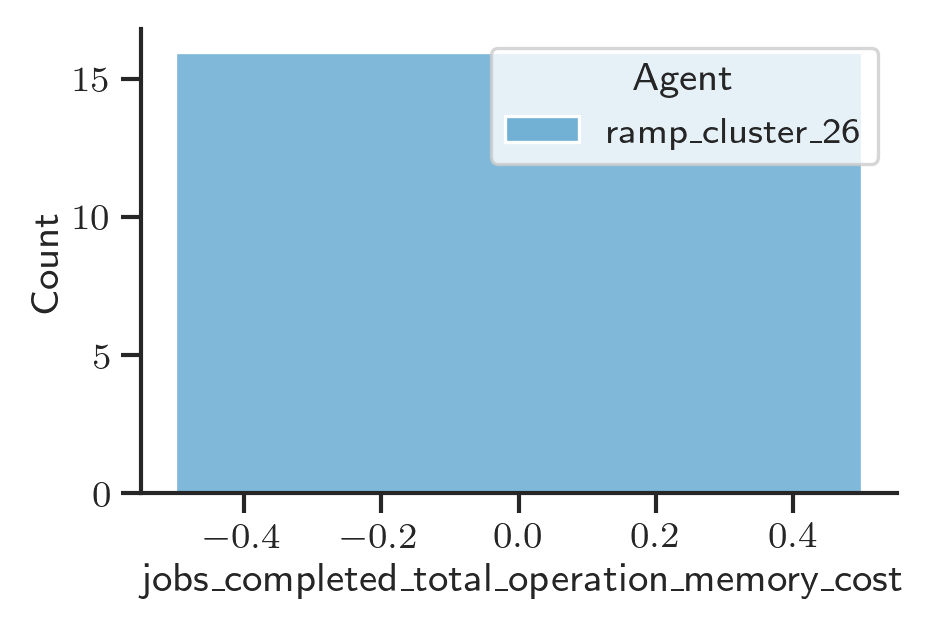

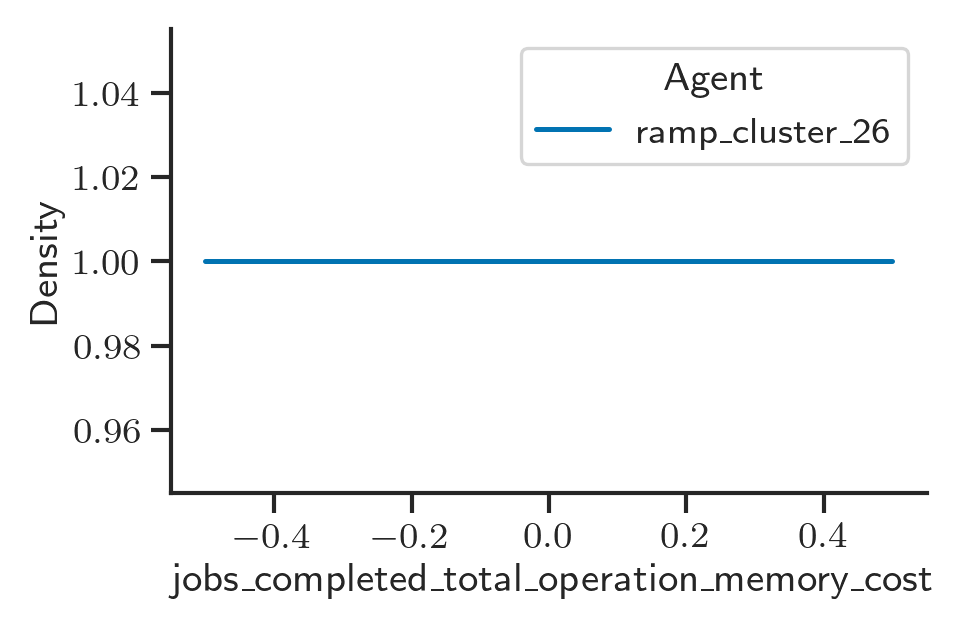

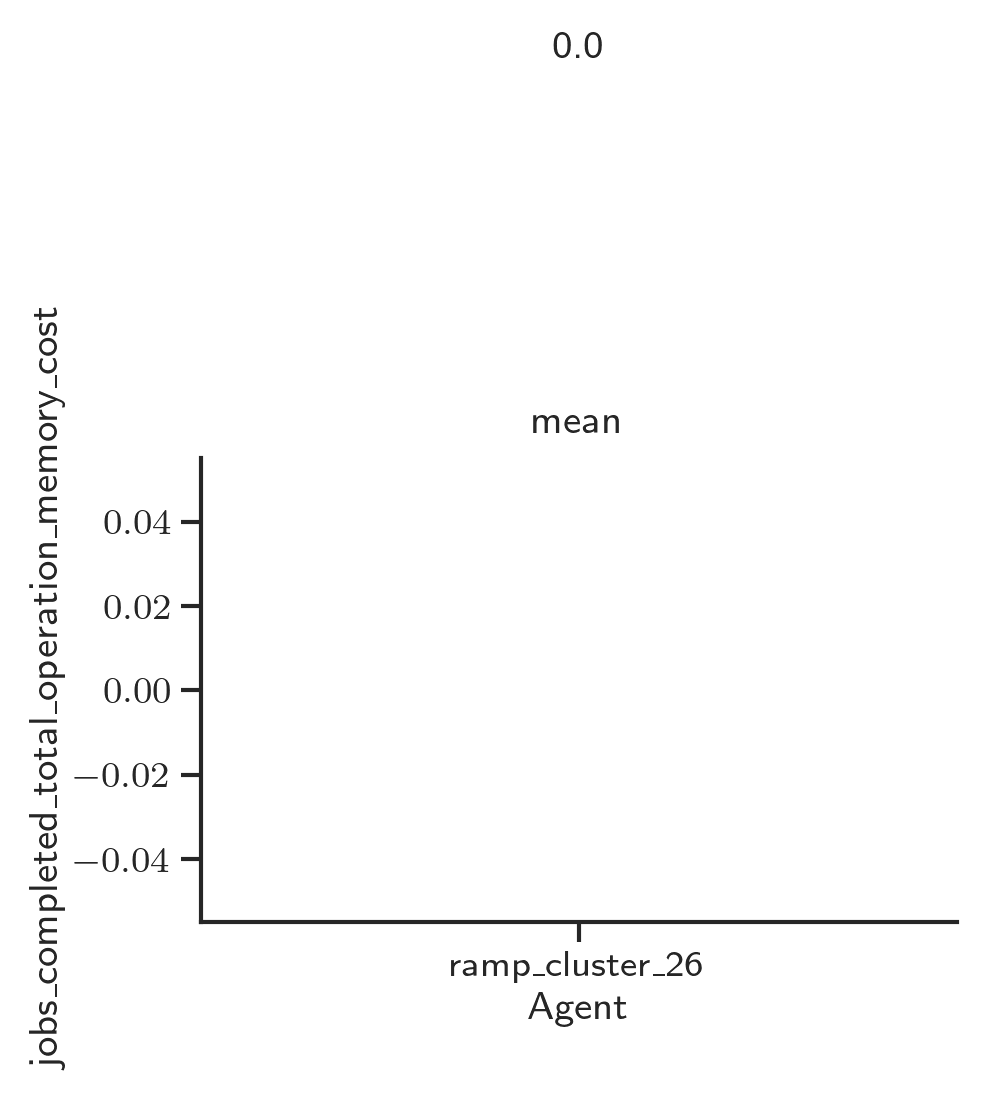

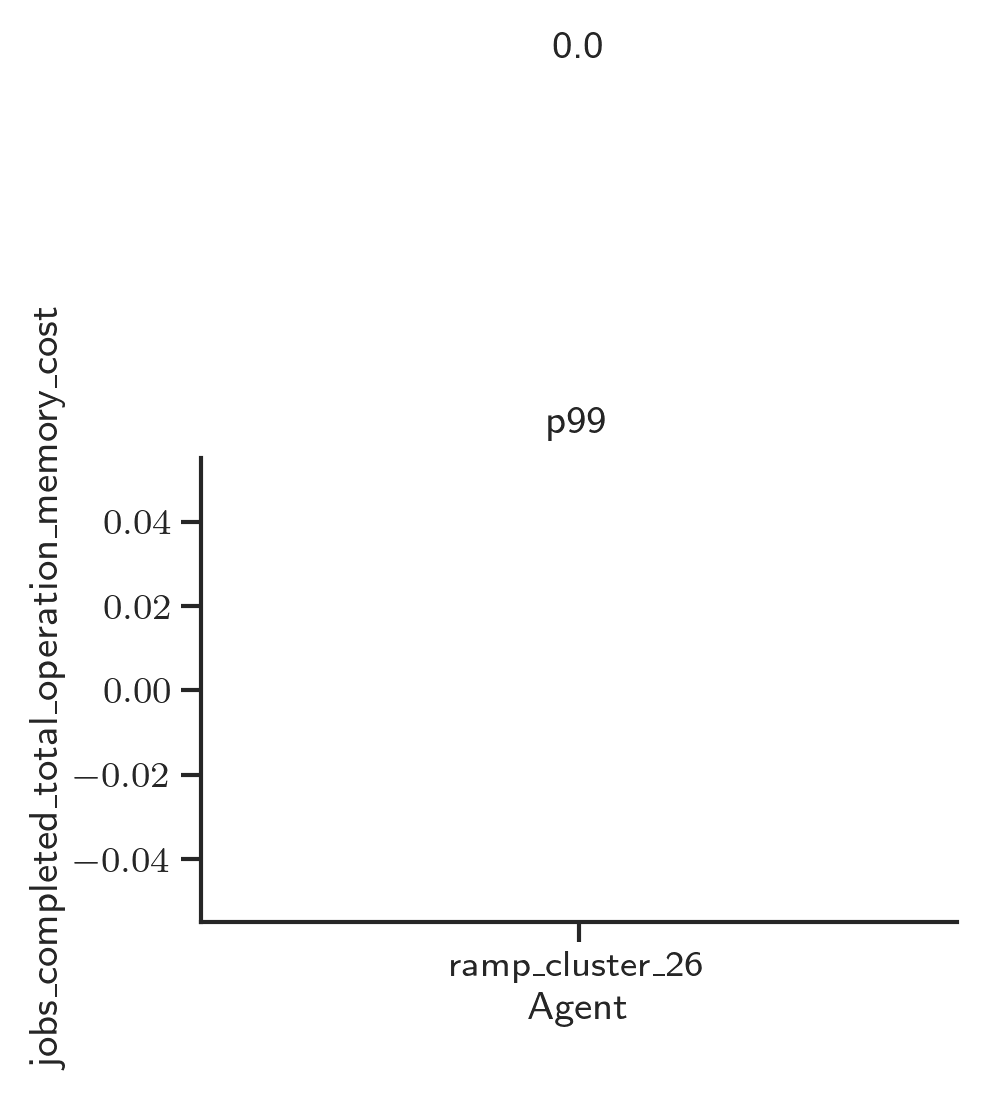

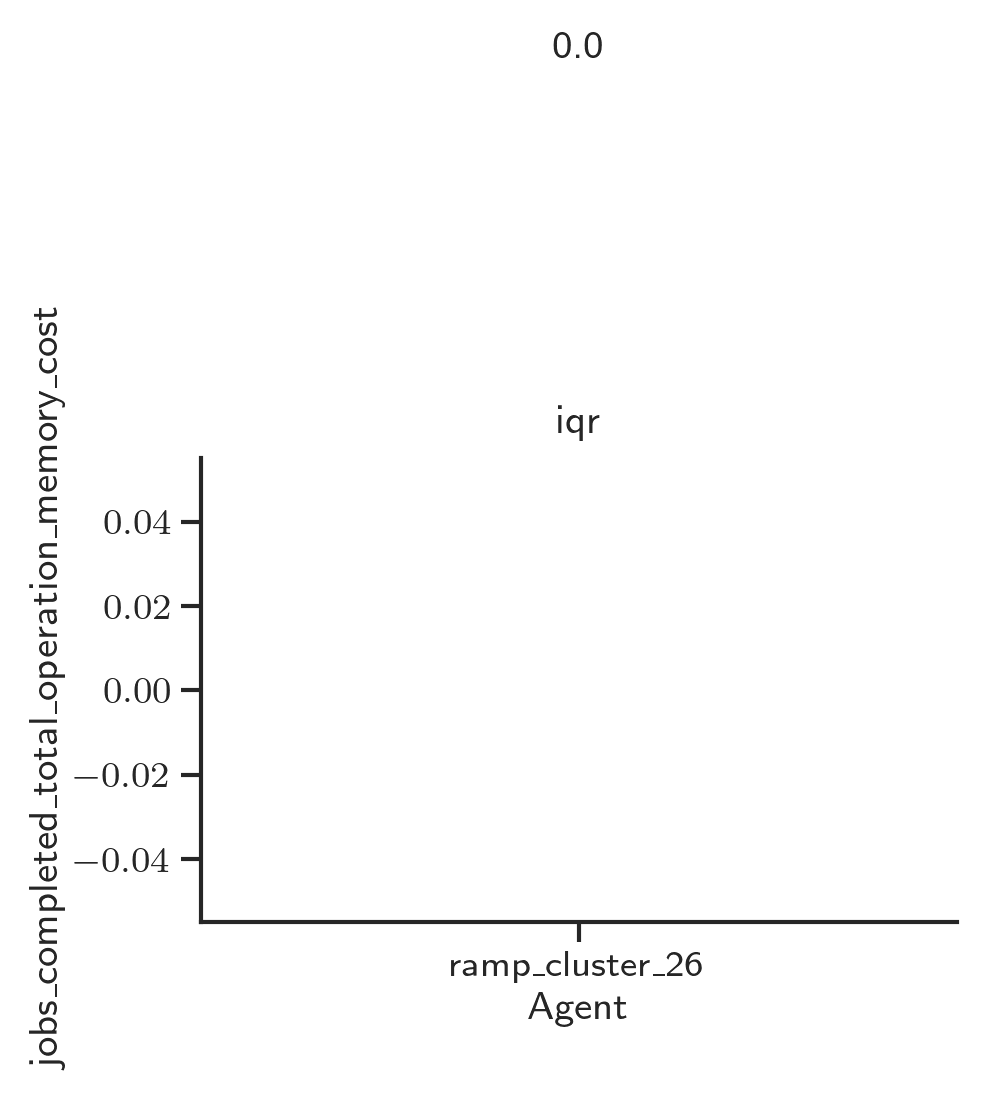

/scratch/zciccwf/py36/envs/ddls/lib/python3.9/site-packages/scipy/stats/stats.py:275: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


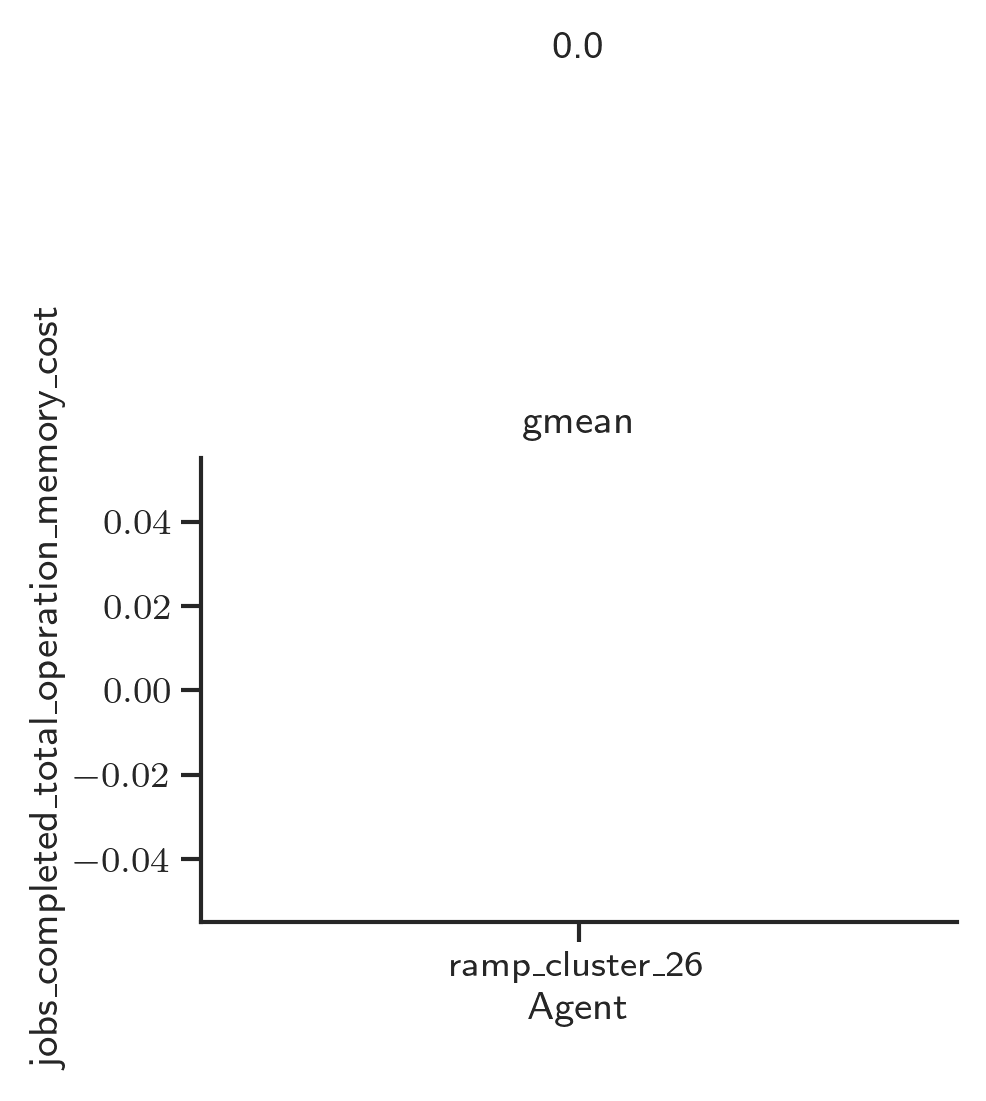

In [21]:
%autoreload

# plot config
scaling_factor = 1
metrics_to_skip = {}
def p99(a):
    return np.percentile(a, 99)
estimators = {'mean': np.mean,
              'p99': p99,
              'iqr': st.iqr,
              'gmean': st.gmean}


# make plots
metrics = sim_logs_dict[agent].keys()
metrics_to_plot = sorted([metric for metric in metrics if metric not in metrics_to_skip])
print(f'Metrics to plot: {metrics_to_plot}\nMetrics to skip: {metrics_to_skip}\n')
for metric in metrics_to_plot:
    print(f'Plotting metric {metric}')
    plot_dict = defaultdict(list)
    for _agent in sim_logs_dict.keys():
        plot_dict['Agent'].extend([_agent for _ in range(len(sim_logs_dict[_agent][metric]))])
        plot_dict[metric].extend(sim_logs_dict[_agent][metric])
        
    df = pd.DataFrame(plot_dict)
        
    # hist
    fig = plot_hist(df,
                    x=metric,
                    hue='Agent',
                    xlabel=metric,
                    element='bars',
                    fill=True,
                    cumulative=False,
                    stat='count',
                    multiple='layer',
                    scaling_factor=scaling_factor,
                    show_fig=True)
    
    # cdf
    fig = plot_hist(df,
                    x=metric,
                    hue='Agent',
                    xlabel=metric,
                    element='step',
                    fill=False,
                    cumulative=True,
                    stat='density',
                    common_norm=False,
                    scaling_factor=scaling_factor,
                    show_fig=True)
        
    # bar chart
    for estimator_name, estimator in estimators.items():
        fig = plot_bar(df, 
                        x='Agent', 
                        y=metric, 
                        xlabel='Agent', 
                        ylabel=metric, 
                        estimator=estimator,
                        title=estimator_name,
                        scaling_factor=scaling_factor,
                        show_fig=True)